    =======================  Data Cleaning, Analysis, and Exploratory Data Insight  ======================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading Dataset from Kaggle Using API

In [2]:
import json
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Load the kaggle.json file manually
with open('F:/Andalosia/kaggle.json') as f:
    kaggle_json = json.load(f)

# Set up the API client
os.environ['KAGGLE_USERNAME'] = kaggle_json['username']
os.environ['KAGGLE_KEY'] = kaggle_json['key']

# Authenticate the API client
api = KaggleApi()
api.authenticate()

#  download the dataset
api.competition_download_files('airbnb-recruiting-new-user-bookings', path='F:/Andalosia')


In [3]:
df_sample_submission_NDF = pd.read_csv('F:/Andalosia/airbnb-recruiting-new-user-bookings/sample_submission_NDF.csv')
df_sessions = pd.read_csv('F:/Andalosia/airbnb-recruiting-new-user-bookings/sessions.csv')
df_countries = pd.read_csv('F:/Andalosia/airbnb-recruiting-new-user-bookings/countries.csv')
df_age_gender = pd.read_csv('F:/Andalosia/airbnb-recruiting-new-user-bookings/age_gender_bkts.csv')

In [120]:
df_train = pd.read_csv('F:/Andalosia/airbnb-recruiting-new-user-bookings/train_users_2.csv')
df_test = pd.read_csv('F:/Andalosia/airbnb-recruiting-new-user-bookings/test_users.csv')

# Data Exploration

In [5]:
df_train

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [6]:
print(f'shape of data is {df_train.shape[0]} , {df_train.shape[1]}')

shape of data is 213451 , 16


In [7]:
df_train.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [9]:
for col in df_train.columns:
    print(f' {col}:  \n number of unique value for each column {df_train[col].nunique()} , \n unique values is {df_train[col].unique()}')
    print('='*100)

 id:  
 number of unique value for each column 213451 , 
 unique values is ['gxn3p5htnn' '820tgsjxq7' '4ft3gnwmtx' ... '6o3arsjbb4' 'jh95kwisub'
 'nw9fwlyb5f']
 date_account_created:  
 number of unique value for each column 1634 , 
 unique values is ['2010-06-28' '2011-05-25' '2010-09-28' ... '2014-06-27' '2014-06-29'
 '2014-06-30']
 timestamp_first_active:  
 number of unique value for each column 213451 , 
 unique values is [20090319043255 20090523174809 20090609231247 ... 20140630235754
 20140630235822 20140630235824]
 date_first_booking:  
 number of unique value for each column 1976 , 
 unique values is [nan '2010-08-02' '2012-09-08' ... '2015-06-25' '2015-06-29' '2015-06-28']
 gender:  
 number of unique value for each column 4 , 
 unique values is ['-unknown-' 'MALE' 'FEMALE' 'OTHER']
 age:  
 number of unique value for each column 127 , 
 unique values is [      nan 3.800e+01 5.600e+01 4.200e+01 4.100e+01 4.600e+01 4.700e+01
 5.000e+01 3.600e+01 3.700e+01 3.300e+01 3.100e+01 2

In [10]:
df_train.isnull().sum()#check for null values

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [11]:
df_train.duplicated().sum()#check duplicates 

0

**Convert the columns to datetime**

In [12]:
df_train['timestamp_first_active'] = df_train['timestamp_first_active'].astype(str)
df_train['timestamp_first_active'] = pd.to_datetime(df_train['timestamp_first_active'], format='%Y%m%d%H%M%S')
print(df_train['timestamp_first_active'].head())

0   2009-03-19 04:32:55
1   2009-05-23 17:48:09
2   2009-06-09 23:12:47
3   2009-10-31 06:01:29
4   2009-12-08 06:11:05
Name: timestamp_first_active, dtype: datetime64[ns]


In [13]:
# Convert the columns to datetime 
df_train['date_account_created'] = pd.to_datetime(df_train['date_account_created'])
df_train['date_first_booking'] = pd.to_datetime(df_train['date_first_booking'])

In [121]:
df_train['date_first_booking'].value_counts()

date_first_booking
2014-05-22    248
2014-06-11    231
2014-06-24    226
2014-05-21    225
2014-06-10    223
             ... 
2010-01-31      1
2010-02-09      1
2010-06-10      1
2010-02-04      1
2015-06-28      1
Name: count, Length: 1976, dtype: int64

In [15]:
df_train['date_first_booking'] = df_train['date_first_booking'].fillna(df_train['date_first_booking'].median())

# Extracting  After Transformation

In [16]:
#  day, month, and year from the datetime columns
df_train['day_account_created'] = df_train['date_account_created'].dt.day
df_train['month_account_created'] = df_train['date_account_created'].dt.month
df_train['year_account_created'] = df_train['date_account_created'].dt.year

df_train['day_first_active'] = df_train['timestamp_first_active'].dt.day
df_train['month_first_active'] = df_train['timestamp_first_active'].dt.month
df_train['year_first_active'] = df_train['timestamp_first_active'].dt.year
# df_train['hour_first_active'] = df_train['timestamp_first_active'].dt.hour

df_train['day_first_booking'] = df_train['date_first_booking'].dt.day
df_train['month_first_booking'] = df_train['date_first_booking'].dt.month
df_train['year_first_booking'] = df_train['date_first_booking'].dt.year

In [17]:
df_train.drop(columns=['date_account_created', 'timestamp_first_active'], inplace=True)

#  Irrelevant Features
1-replace

2-drop

In [18]:
df_train['gender'] = df_train['gender'].replace('-unknown-', 'Unknown')
df_train['first_browser'] = df_train['first_browser'].replace('-unknown-', 'Unknown')

In [19]:
df_train['age'].value_counts()

age
30.0      6124
31.0      6016
29.0      5963
28.0      5939
32.0      5855
          ... 
1925.0       1
1935.0       1
1933.0       1
112.0        1
1926.0       1
Name: count, Length: 127, dtype: int64

In [20]:
print("Mean Age:", df_train['age'].mean())
print("Median Age:", df_train['age'].median())

Mean Age: 49.66833517985669
Median Age: 34.0


**Replaced  ages (outside 18–100) with the mean age**

In [21]:
min_age = 18
max_age = 100

df_train['age'] = df_train['age'].apply(lambda x: x if min_age <= x <= max_age else df_train['age'].median())
df_train['age']

0         34.0
1         38.0
2         56.0
3         42.0
4         41.0
          ... 
213446    32.0
213447    34.0
213448    32.0
213449    34.0
213450    34.0
Name: age, Length: 213451, dtype: float64

**Categorize the 'age' column into  age groups using bins**

In [22]:
bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']

df_train['age_group'] = pd.cut(df_train['age'], bins=bins, labels=labels, right=False)
print(df_train['age_group'].value_counts())

age_group
26-35     146187
36-45      30759
46-55      14521
18-25      10677
56-65       7599
66-75       2902
76-85        481
86-100       299
Name: count, dtype: int64


In [23]:
df_train.drop(columns=['age'], inplace=True)

# check for null values

In [24]:
# df_train['age_group'].isnull().sum()
df_train.isnull().sum()

id                            0
date_first_booking            0
gender                        0
signup_method                 0
signup_flow                   0
language                      0
affiliate_channel             0
affiliate_provider            0
first_affiliate_tracked    6065
signup_app                    0
first_device_type             0
first_browser                 0
country_destination           0
day_account_created           0
month_account_created         0
year_account_created          0
day_first_active              0
month_first_active            0
year_first_active             0
day_first_booking             0
month_first_booking           0
year_first_booking            0
age_group                    26
dtype: int64

### Handling Missing Data with SimpleImputer

In [25]:
from sklearn.impute import SimpleImputer

# Create imputers
mode_imputer = SimpleImputer(strategy='most_frequent')  

categorical_columns = [ 'first_affiliate_tracked','age_group']
df_train[categorical_columns] = mode_imputer.fit_transform(df_train[categorical_columns])

In [26]:
df_train.isnull().any().any()

False

Finally No missing Values

Dtypes After Transform

In [27]:
df_train.dtypes

id                                 object
date_first_booking         datetime64[ns]
gender                             object
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
day_account_created                 int32
month_account_created               int32
year_account_created                int32
day_first_active                    int32
month_first_active                  int32
year_first_active                   int32
day_first_booking                   int32
month_first_booking                 int32
year_first_booking                  int32
age_group                          object
dtype: object

In [28]:
for col in df_train.columns:
    print(f' {col}:  \n number of unique value for each column {df_train[col].nunique()} , \n unique values is {df_train[col].unique()}')
    print('='*100)

 id:  
 number of unique value for each column 213451 , 
 unique values is ['gxn3p5htnn' '820tgsjxq7' '4ft3gnwmtx' ... '6o3arsjbb4' 'jh95kwisub'
 'nw9fwlyb5f']
 date_first_booking:  
 number of unique value for each column 1976 , 
 unique values is <DatetimeArray>
['2013-09-11 00:00:00', '2010-08-02 00:00:00', '2012-09-08 00:00:00',
 '2010-02-18 00:00:00', '2010-01-02 00:00:00', '2010-01-05 00:00:00',
 '2010-01-13 00:00:00', '2010-07-29 00:00:00', '2010-01-04 00:00:00',
 '2010-01-06 00:00:00',
 ...
 '2015-06-06 00:00:00', '2015-06-09 00:00:00', '2015-06-22 00:00:00',
 '2015-06-23 00:00:00', '2015-06-18 00:00:00', '2015-06-14 00:00:00',
 '2015-06-26 00:00:00', '2015-06-25 00:00:00', '2015-06-29 00:00:00',
 '2015-06-28 00:00:00']
Length: 1976, dtype: datetime64[ns]
 gender:  
 number of unique value for each column 4 , 
 unique values is ['Unknown' 'MALE' 'FEMALE' 'OTHER']
 signup_method:  
 number of unique value for each column 3 , 
 unique values is ['facebook' 'basic' 'google']
 sign

# EDA (Exploratory Data Analysis)

1-Univariate Analysis

2-Bivariate Analysis

3-Multivariate Analysis

In [29]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
date_first_booking,213451,2013-08-13 13:37:17.487760896,2010-01-02 00:00:00,2013-09-11 00:00:00,2013-09-11 00:00:00,2013-09-11 00:00:00,2015-06-29 00:00:00,NaN
signup_flow,213451.0,3.267387,0.0,0.0,0.0,0.0,25.0,7.637707
day_account_created,213451.0,15.86923,1.0,8.0,16.0,23.0,31.0,8.740107
month_account_created,213451.0,6.022459,1.0,3.0,6.0,9.0,12.0,3.23669
year_account_created,213451.0,2013.023846,2010.0,2012.0,2013.0,2014.0,2014.0,0.938489
day_first_active,213451.0,15.869071,1.0,8.0,16.0,23.0,31.0,8.739582
month_first_active,213451.0,6.022385,1.0,3.0,6.0,9.0,12.0,3.236501
year_first_active,213451.0,2013.023218,2009.0,2012.0,2013.0,2014.0,2014.0,0.939039
day_first_booking,213451.0,12.934561,1.0,11.0,11.0,13.0,31.0,6.079097
month_first_booking,213451.0,7.796487,1.0,7.0,9.0,9.0,12.0,2.498683


In [30]:
df_train.columns

Index(['id', 'date_first_booking', 'gender', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'day_account_created',
       'month_account_created', 'year_account_created', 'day_first_active',
       'month_first_active', 'year_first_active', 'day_first_booking',
       'month_first_booking', 'year_first_booking', 'age_group'],
      dtype='object')

                                         1-univariate analysis

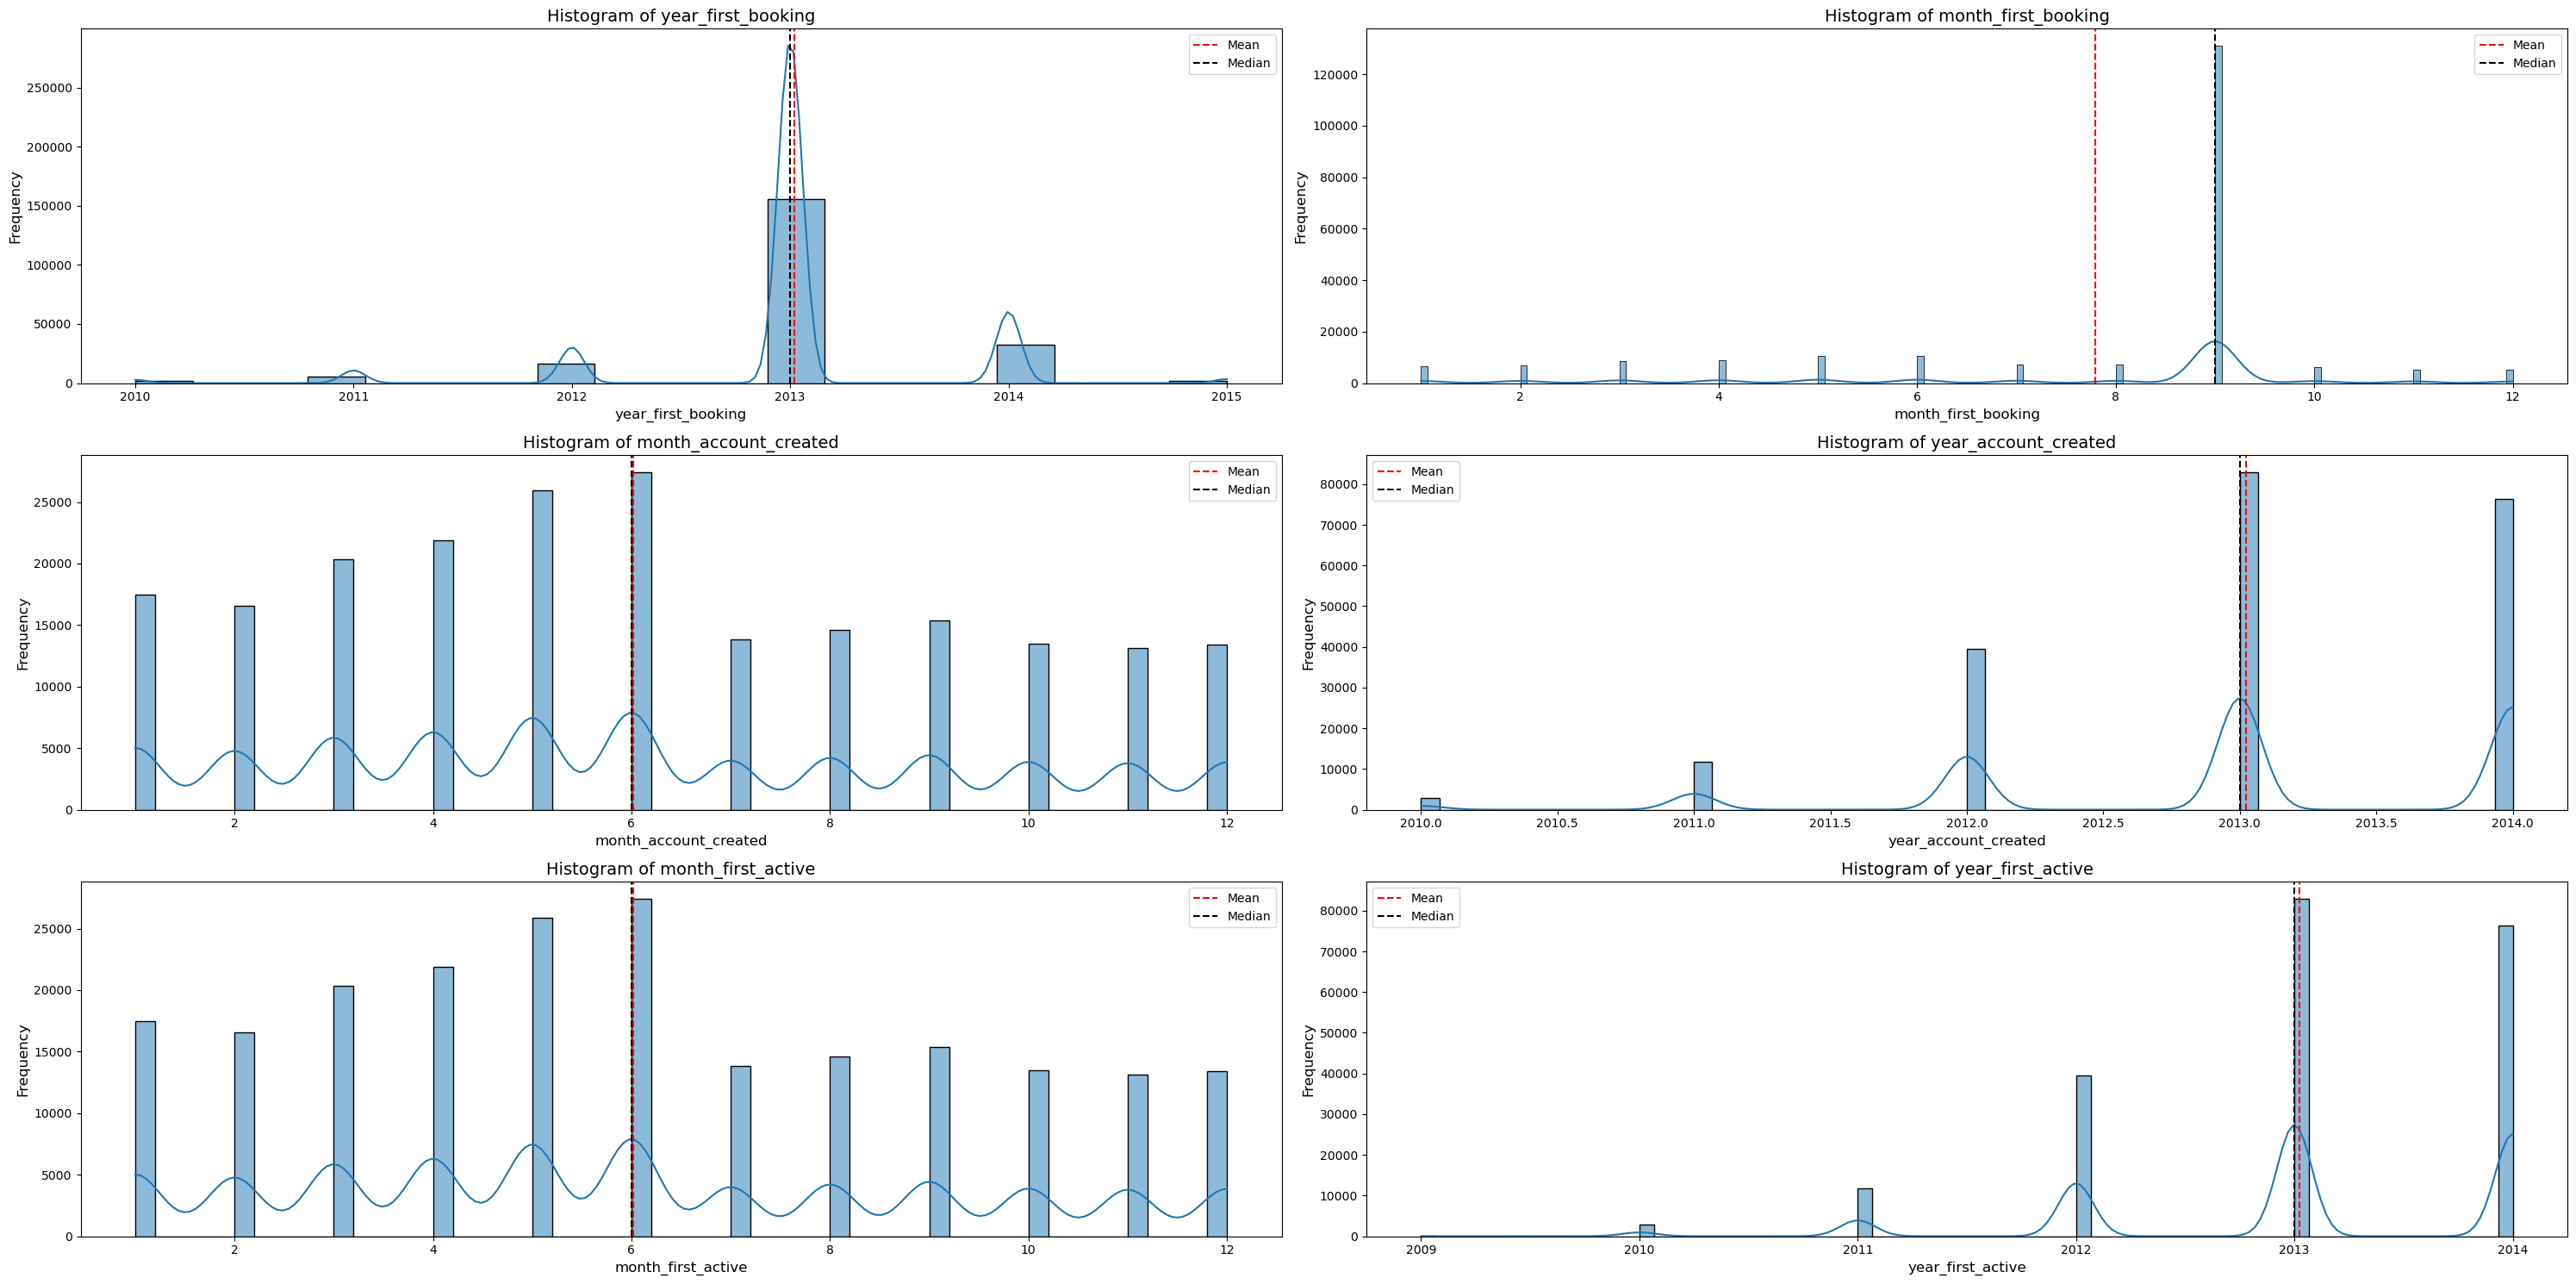

In [31]:
numeric_columns = ['year_first_booking', 'month_first_booking',
       'month_account_created', 'year_account_created',
       'month_first_active', 'year_first_active']

plt.figure(figsize=(30, 15))

for i, col in enumerate(numeric_columns):
    plt.subplot(3,2, i + 1)  
    ax = sns.histplot(df_train[col], kde=True)  
    ax.axvline(df_train[col].mean(), color='red', linestyle='--', label='Mean')  
    ax.axvline(df_train[col].median(), color='black', linestyle='--', label='Median')  
    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.tight_layout()

plt.show()


1. **Year of First Booking**:  
   - Most bookings happened in **2013** (mean and median both around **2013**).

2. **Month of First Booking**:  
   - Bookings peaked in **(9)**.

3. **Month Account Created**:  
   - Most accounts were created in **June (6)** and **July (7)**.

4. **Year Account Created**:  
   - Majority of accounts were created in **2013**.

5. **First Active (Month & Year)**:  
   - Accounts became active mostly in **June (6)** and **2013**.

**Key Insight**:  
Most user activity happened in mid-year (June & July) and during 2013, showing seasonal patterns.

In [32]:
# Count values for 'month_first_booking' and 'year_first_booking'
month_counts = df_train['month_first_booking'].value_counts().sort_index(ascending=False)
year_counts = df_train['year_first_booking'].value_counts().sort_index(ascending=False)

# Print the counts in descending order
print("Counts for 'month_first_booking' in descending order:")
print(month_counts.sort_values(ascending=False))
print("\nCounts for 'year_first_booking' in descending order:")
print(year_counts.sort_values(ascending=False))

Counts for 'month_first_booking' in descending order:
month_first_booking
9     131141
6      10509
5      10478
4       8813
3       8391
7       7249
8       7055
2       6790
1       6491
10      6184
11      5264
12      5086
Name: count, dtype: int64

Counts for 'year_first_booking' in descending order:
year_first_booking
2013    155802
2014     32419
2012     16241
2011      5738
2015      1772
2010      1479
Name: count, dtype: int64


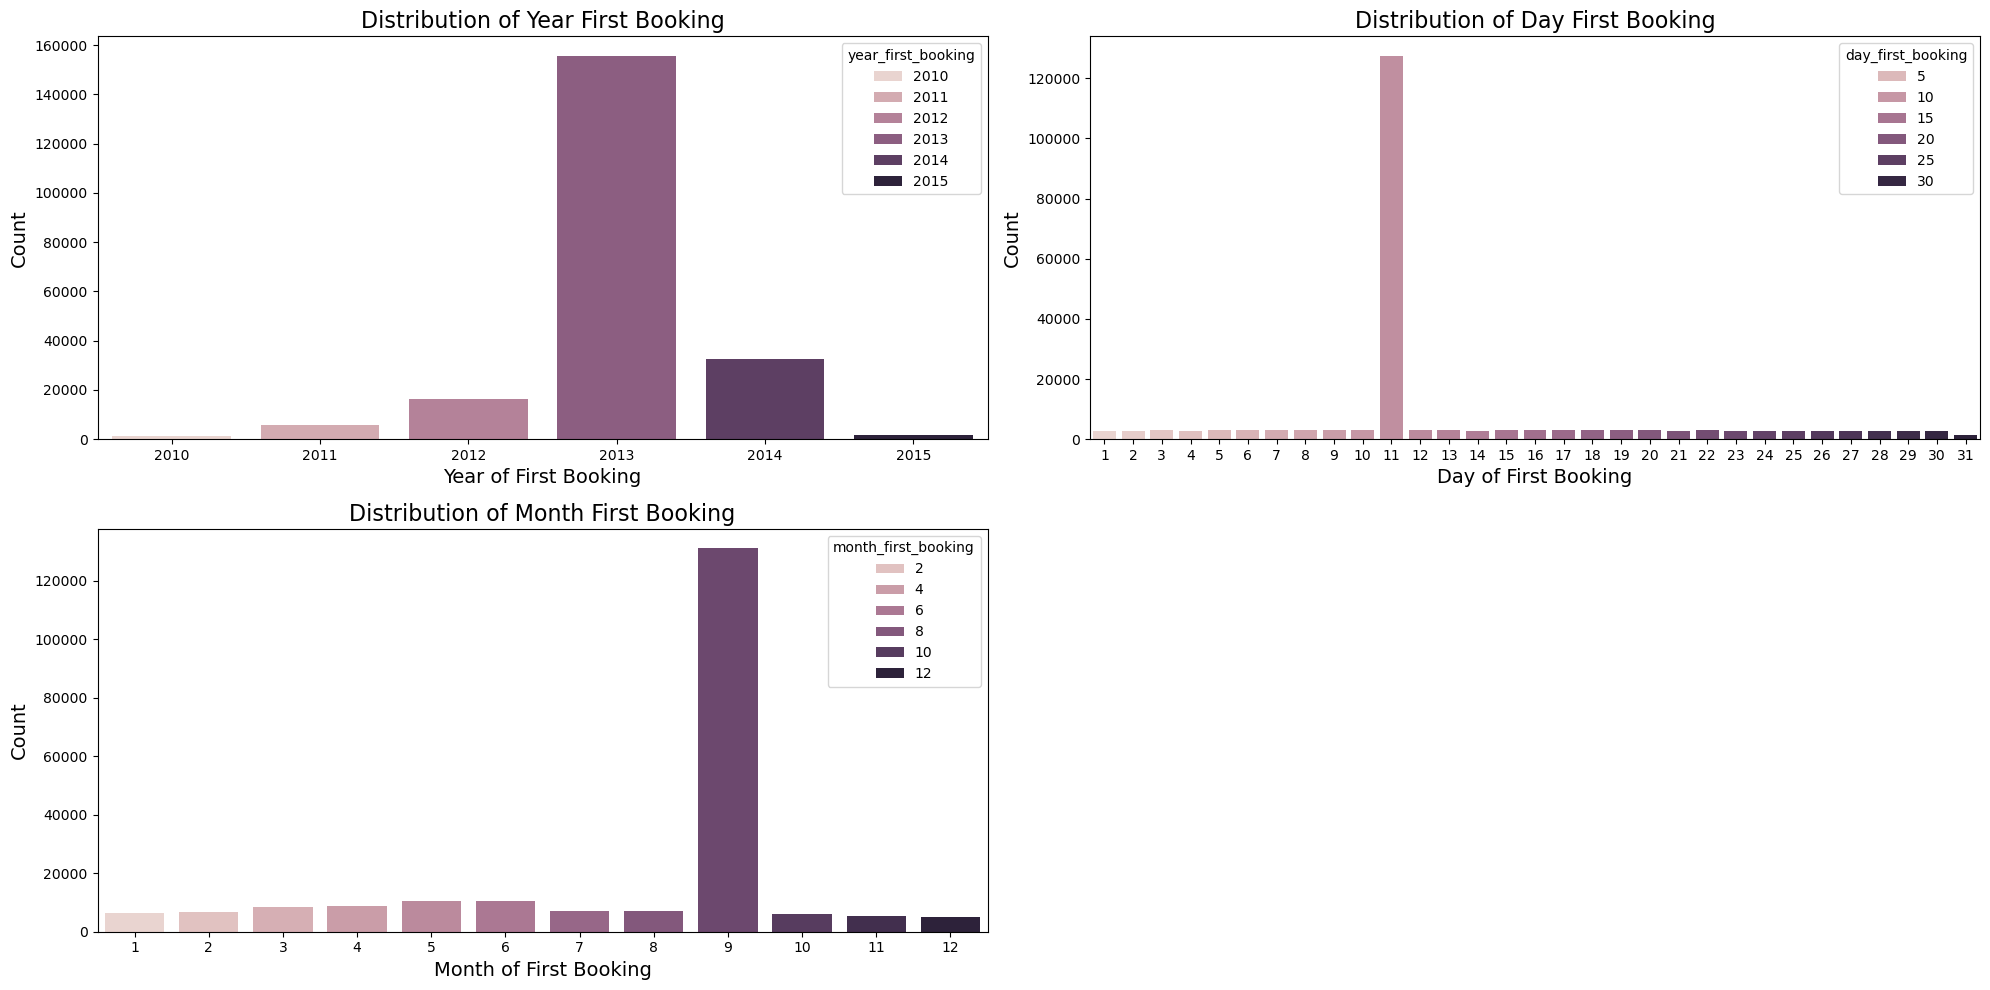

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Visualization for 'year_first_booking'
sns.countplot(x='year_first_booking', data=df_train,hue='year_first_booking', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Year First Booking', fontsize=16)
axes[0, 0].set_xlabel('Year of First Booking', fontsize=14)
axes[0, 0].set_ylabel('Count', fontsize=14)

# Visualization for 'day_first_booking'
sns.countplot(x='day_first_booking', data=df_train,hue='day_first_booking', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Day First Booking', fontsize=16)
axes[0, 1].set_xlabel('Day of First Booking', fontsize=14)
axes[0, 1].set_ylabel('Count', fontsize=14)

# Visualization for 'month_first_booking'
sns.countplot(x='month_first_booking', data=df_train, hue='month_first_booking', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Month First Booking', fontsize=16)
axes[1, 0].set_xlabel('Month of First Booking', fontsize=14)
axes[1, 0].set_ylabel('Count', fontsize=14)

axes[1, 1].axis('off')  

plt.tight_layout()
plt.show()


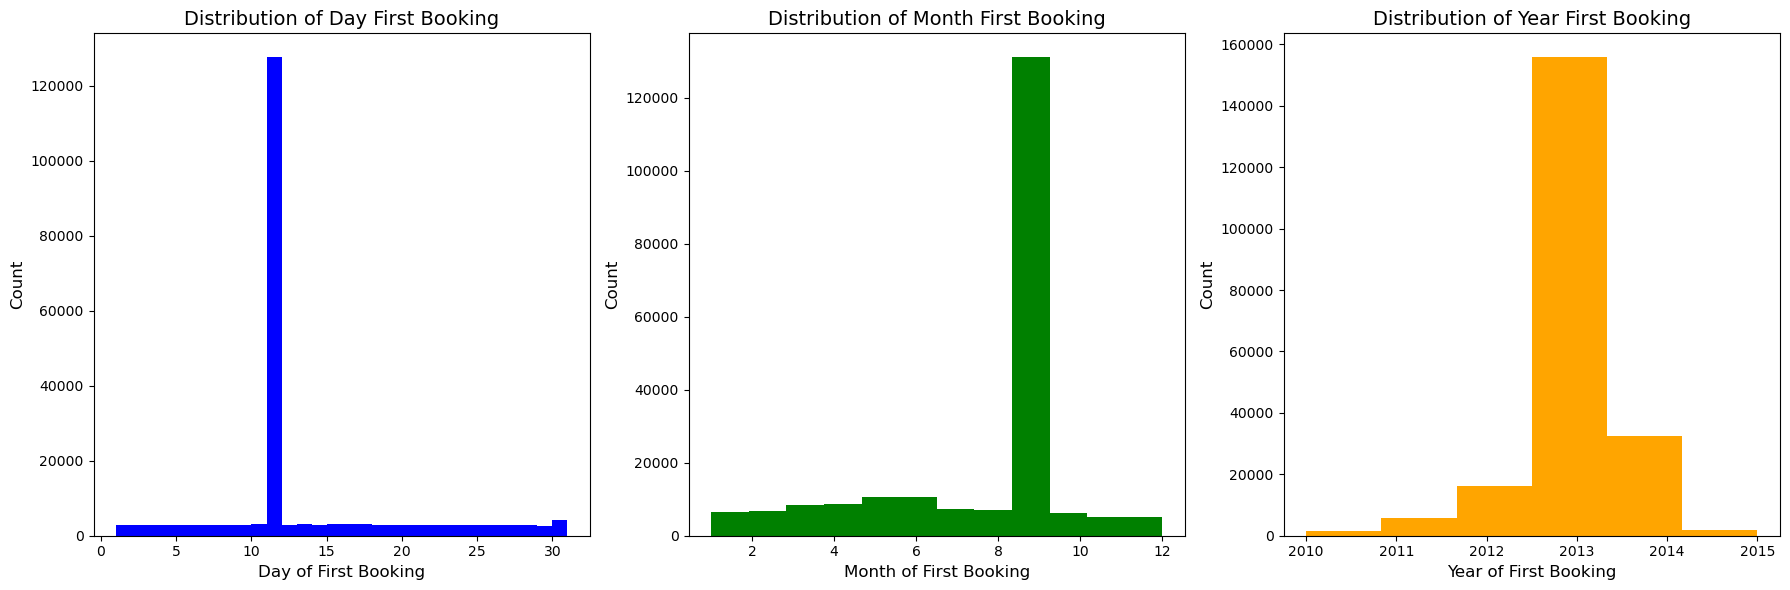

In [34]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

df_train['day_first_booking'].plot(kind='hist', ax=axes[0], bins=30, color='blue')
axes[0].set_title('Distribution of Day First Booking', fontsize=14)
axes[0].set_xlabel('Day of First Booking', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

df_train['month_first_booking'].plot(kind='hist', ax=axes[1], bins=12, color='green')
axes[1].set_title('Distribution of Month First Booking', fontsize=14)
axes[1].set_xlabel('Month of First Booking', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

df_train['year_first_booking'].plot(kind='hist', ax=axes[2], bins=6, color='orange')
axes[2].set_title('Distribution of Year First Booking', fontsize=14)
axes[2].set_xlabel('Year of First Booking', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)

plt.tight_layout()

plt.show()


  **This is similar to the histogram I plotted earlier**
1. **Day of First Booking (Left Chart)**:  
   - Most first bookings happened on **one specific day** (likely the 11th), while very few bookings happened on other days.  

2. **Month of First Booking (Middle Chart)**:  
   - A **specific month** (september) had the highest number of first bookings compared to other months.  

3. **Year of First Booking (Right Chart)**:  
   - Most first bookings were made in **one year** (likely 2013), and bookings in other years were much fewer.  

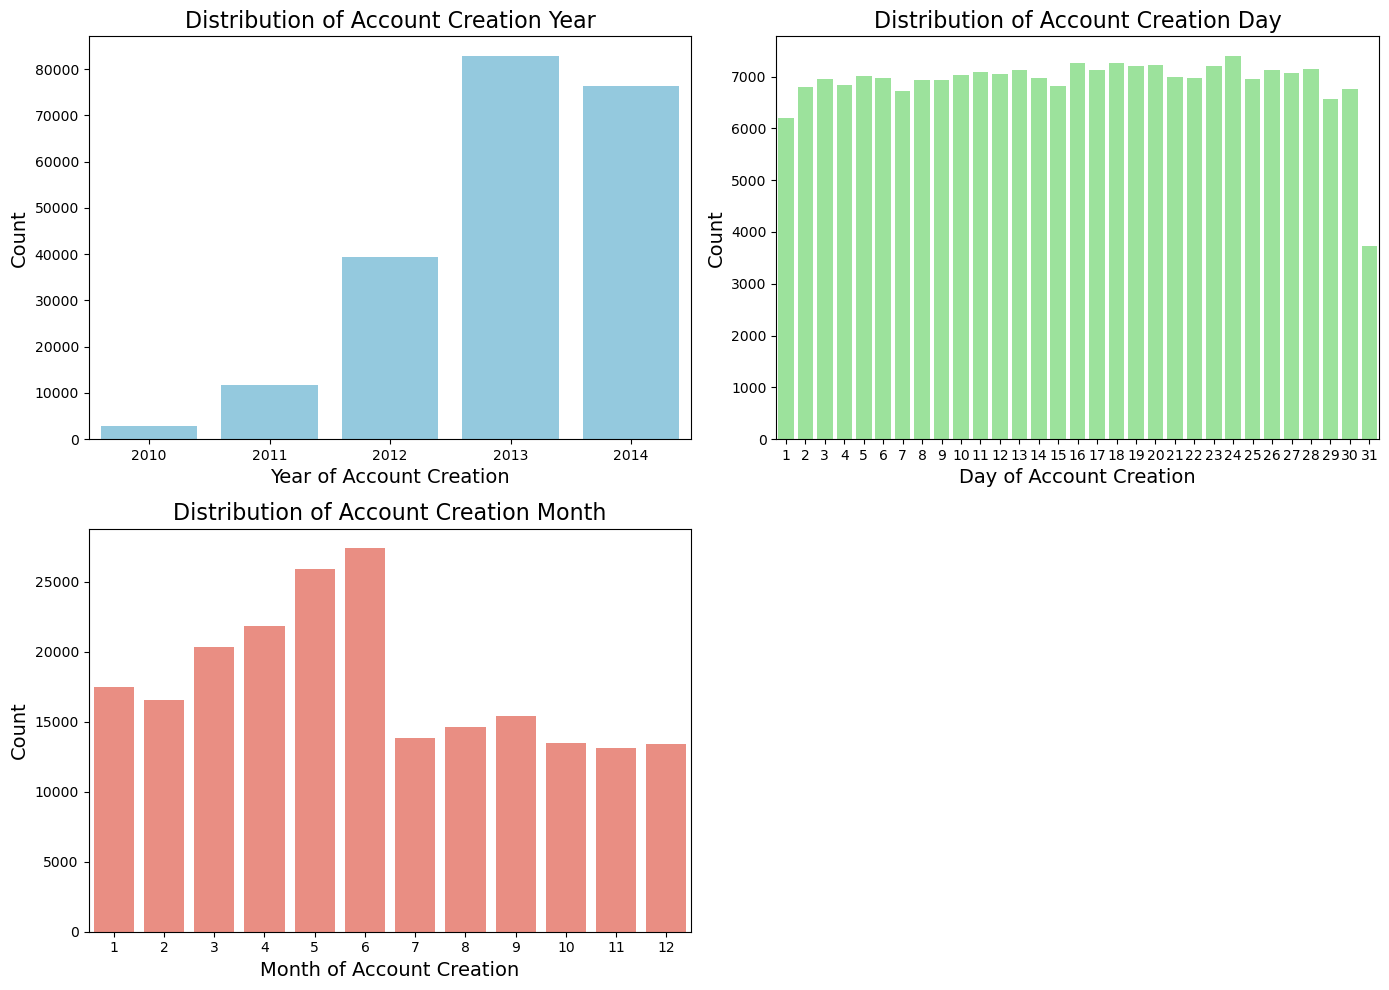

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10)) 

# Visualization for 'year_account_created'
sns.countplot(x='year_account_created', data=df_train, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Account Creation Year', fontsize=16)
axes[0, 0].set_xlabel('Year of Account Creation', fontsize=14)
axes[0, 0].set_ylabel('Count', fontsize=14)

# Visualization for 'day_account_created'
sns.countplot(x='day_account_created', data=df_train, color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Account Creation Day', fontsize=16)
axes[0, 1].set_xlabel('Day of Account Creation', fontsize=14)
axes[0, 1].set_ylabel('Count', fontsize=14)

# Visualization for 'month_account_created'
sns.countplot(x='month_account_created', data=df_train, color='salmon', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Account Creation Month', fontsize=16)
axes[1, 0].set_xlabel('Month of Account Creation', fontsize=14)
axes[1, 0].set_ylabel('Count', fontsize=14)

axes[1, 1].axis('off')  

plt.tight_layout()
plt.show()


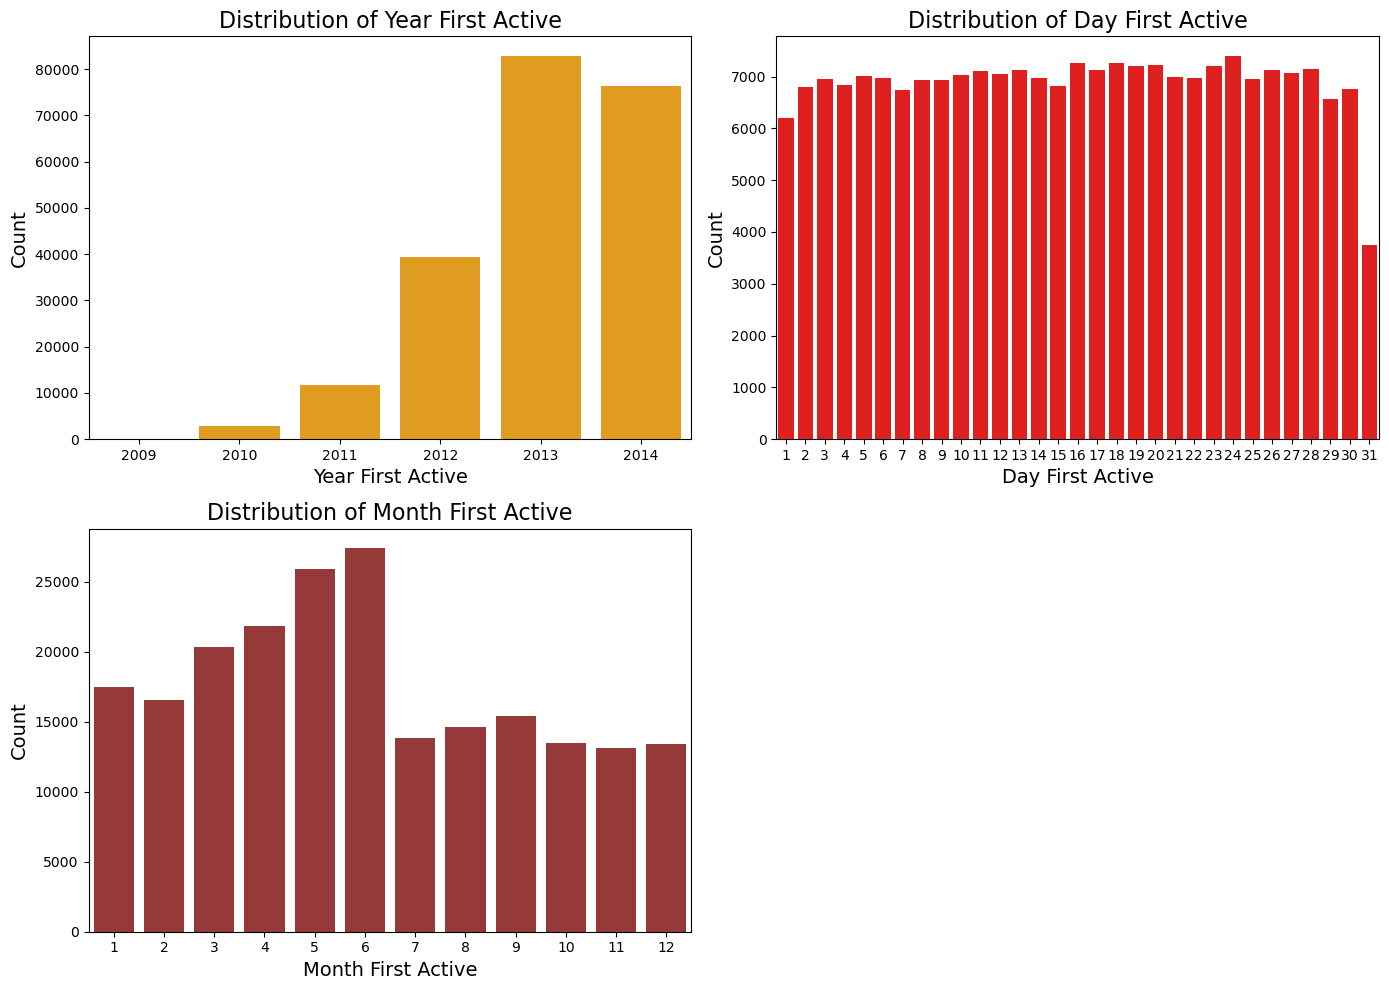

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10)) 

# Visualization for 'year_first_active'
sns.countplot(x='year_first_active', data=df_train, color='orange', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Year First Active', fontsize=16)
axes[0, 0].set_xlabel('Year First Active', fontsize=14)
axes[0, 0].set_ylabel('Count', fontsize=14)

# Visualization for 'day_first_active'
sns.countplot(x='day_first_active', data=df_train, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Day First Active', fontsize=16)
axes[0, 1].set_xlabel('Day First Active', fontsize=14)
axes[0, 1].set_ylabel('Count', fontsize=14)

# Visualization for 'month_first_active'
sns.countplot(x='month_first_active', data=df_train, color='brown', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Month First Active', fontsize=16)
axes[1, 0].set_xlabel('Month First Active', fontsize=14)
axes[1, 0].set_ylabel('Count', fontsize=14)


axes[1, 1].axis('off')  

plt.tight_layout()
plt.show()


country_destination
NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: count, dtype: int64


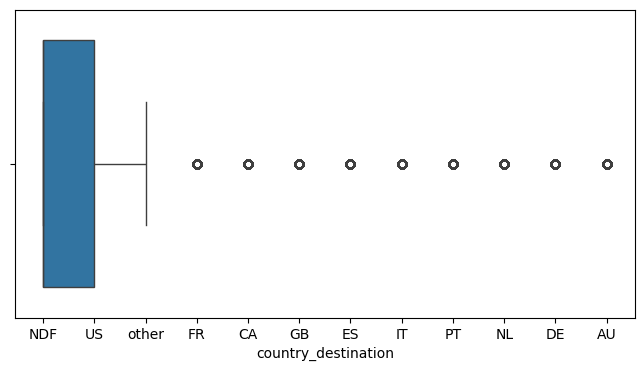

In [37]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_train,x='country_destination') 
print(df_train['country_destination'].value_counts())

The boxplot shows that most users' destination is **"NDF"** (No Destination Found), followed by the **"US"** and **"Other"** destinations.  
Destinations like **France (FR)**, **Canada (CA)**, and **Great Britain (GB)** have very few users, which shows a big imbalance in the data.

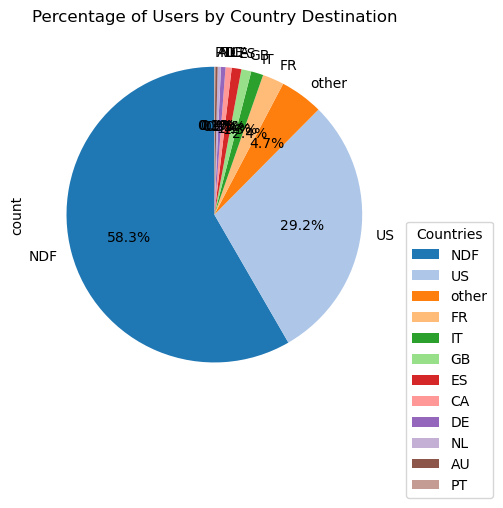

In [38]:
df_train['country_destination'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors,
)
plt.legend( title="Countries", loc="best", bbox_to_anchor=(1, 0.5))
plt.title("Percentage of Users by Country Destination")
plt.show()

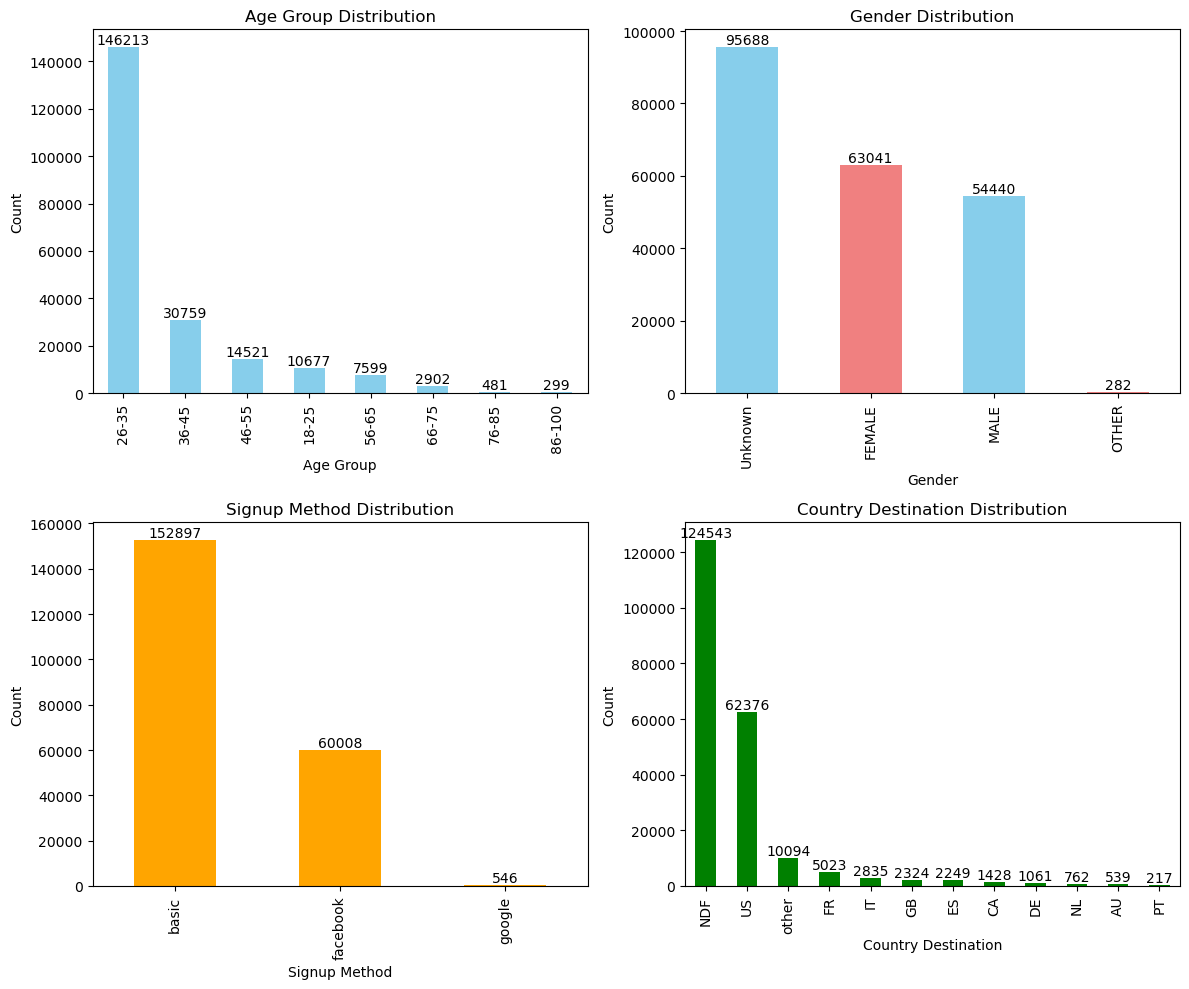

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 

df_train['age_group'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Group Distribution')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Count')
axes[0, 0].bar_label(axes[0, 0].containers[0])

df_train['gender'].value_counts().plot(kind='bar', ax=axes[0, 1], color=['skyblue', 'lightcoral'])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
axes[0, 1].bar_label(axes[0, 1].containers[0])

df_train['signup_method'].value_counts().plot(kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Signup Method Distribution')
axes[1, 0].set_xlabel('Signup Method')
axes[1, 0].set_ylabel('Count')
axes[1, 0].bar_label(axes[1, 0].containers[0])

df_train['country_destination'].value_counts().plot(kind='bar', ax=axes[1, 1], color='green')
axes[1, 1].set_title('Country Destination Distribution')
axes[1, 1].set_xlabel('Country Destination')
axes[1, 1].set_ylabel('Count')
axes[1, 1].bar_label(axes[1, 1].containers[0])

plt.tight_layout()
plt.show()


1. **Age Group:** Most users are aged **46-55**, followed by **26-35** and **36-45**. Few users are younger than 25 or older than 55.  

2. **Gender:** Many users have an **Unknown** gender. Among known genders, **Female** slightly outnumber **Male**.  

3. **Signup Method:** Most users use **Basic** signup, followed by **Facebook**. Very few use **Google**.  

4. **Country Destination:** **NDF (No Destination Found)** is the largest group. 
, **US** is the most popular, followed by **Other** and **France**.  

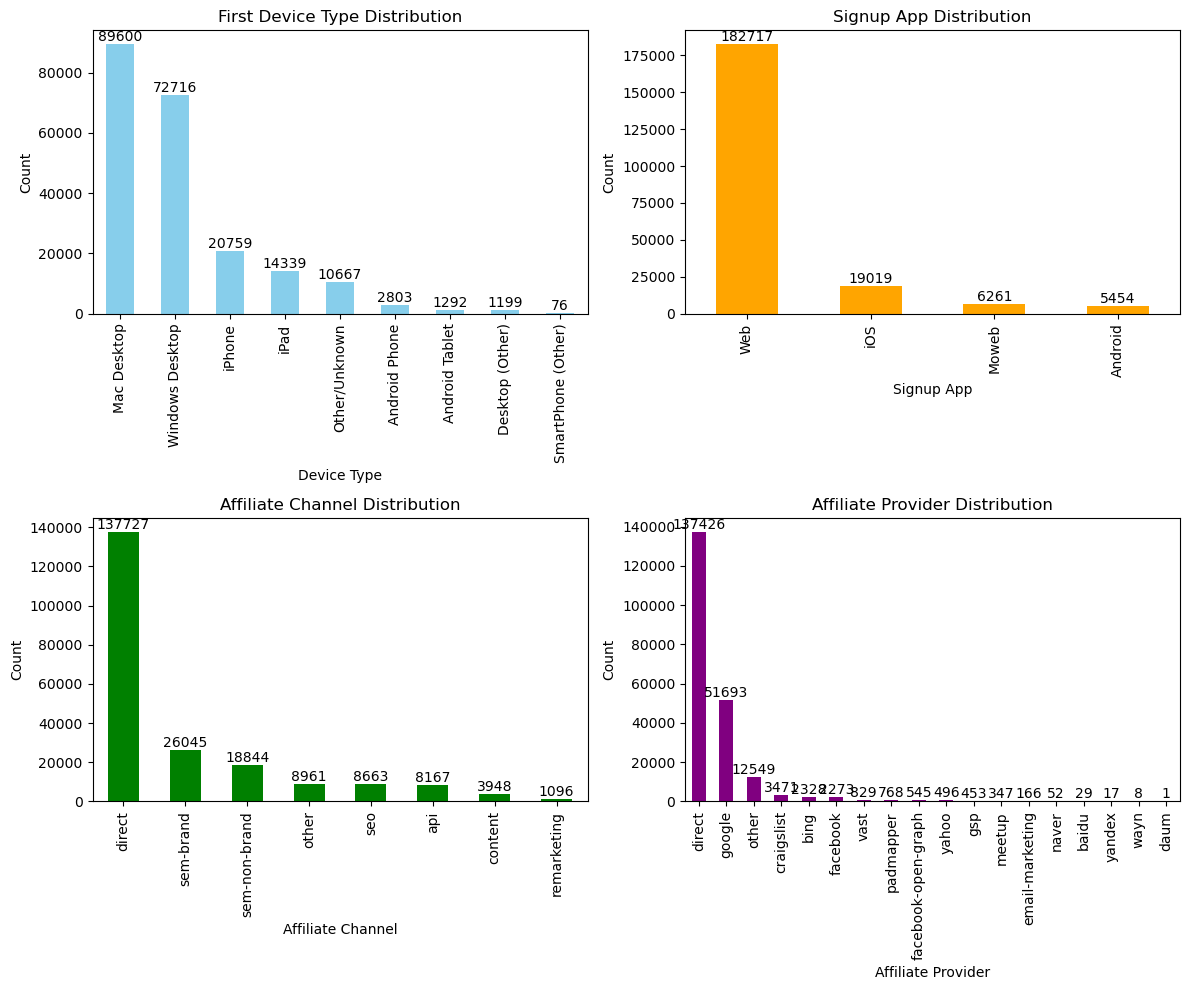

In [40]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 3 rows and 2 columns

df_train['first_device_type'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('First Device Type Distribution')
axes[0, 0].set_xlabel('Device Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].bar_label(axes[0, 0].containers[0])


df_train['signup_app'].value_counts().plot(kind='bar', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Signup App Distribution')
axes[0, 1].set_xlabel('Signup App')
axes[0, 1].set_ylabel('Count')
axes[0, 1].bar_label(axes[0, 1].containers[0])

df_train['affiliate_channel'].value_counts().plot(kind='bar', ax=axes[1, 0], color='green')
axes[1, 0].set_title('Affiliate Channel Distribution')
axes[1, 0].set_xlabel('Affiliate Channel')
axes[1, 0].set_ylabel('Count')
axes[1, 0].bar_label(axes[1, 0].containers[0])

df_train['affiliate_provider'].value_counts().plot(kind='bar', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Affiliate Provider Distribution')
axes[1, 1].set_xlabel('Affiliate Provider')
axes[1, 1].set_ylabel('Count')
axes[1, 1].bar_label(axes[1, 1].containers[0])

plt.tight_layout()
plt.show()



1. **First Device Type**:  
   - Most people use **Mac Desktop** or **Windows Desktop**, followed by **iPhone** and **iPad**. Android devices are used much less.

2. **Signup App**:  
   - Most signups happen on **Web**, followed by **iOS**. Very few use **Moweb** or **Android**.

3. **Affiliate Channel**:  
   - **Direct** is the most common channel, with fewer users coming from **sem-brand** or **sem-non-brand**. Channels like **content** and **remarketing** are rarely used.

4. **Affiliate Provider**:  
   - **Direct** and **Google** are the biggest providers 


In [41]:
df_train.columns

Index(['id', 'date_first_booking', 'gender', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'day_account_created',
       'month_account_created', 'year_account_created', 'day_first_active',
       'month_first_active', 'year_first_active', 'day_first_booking',
       'month_first_booking', 'year_first_booking', 'age_group'],
      dtype='object')

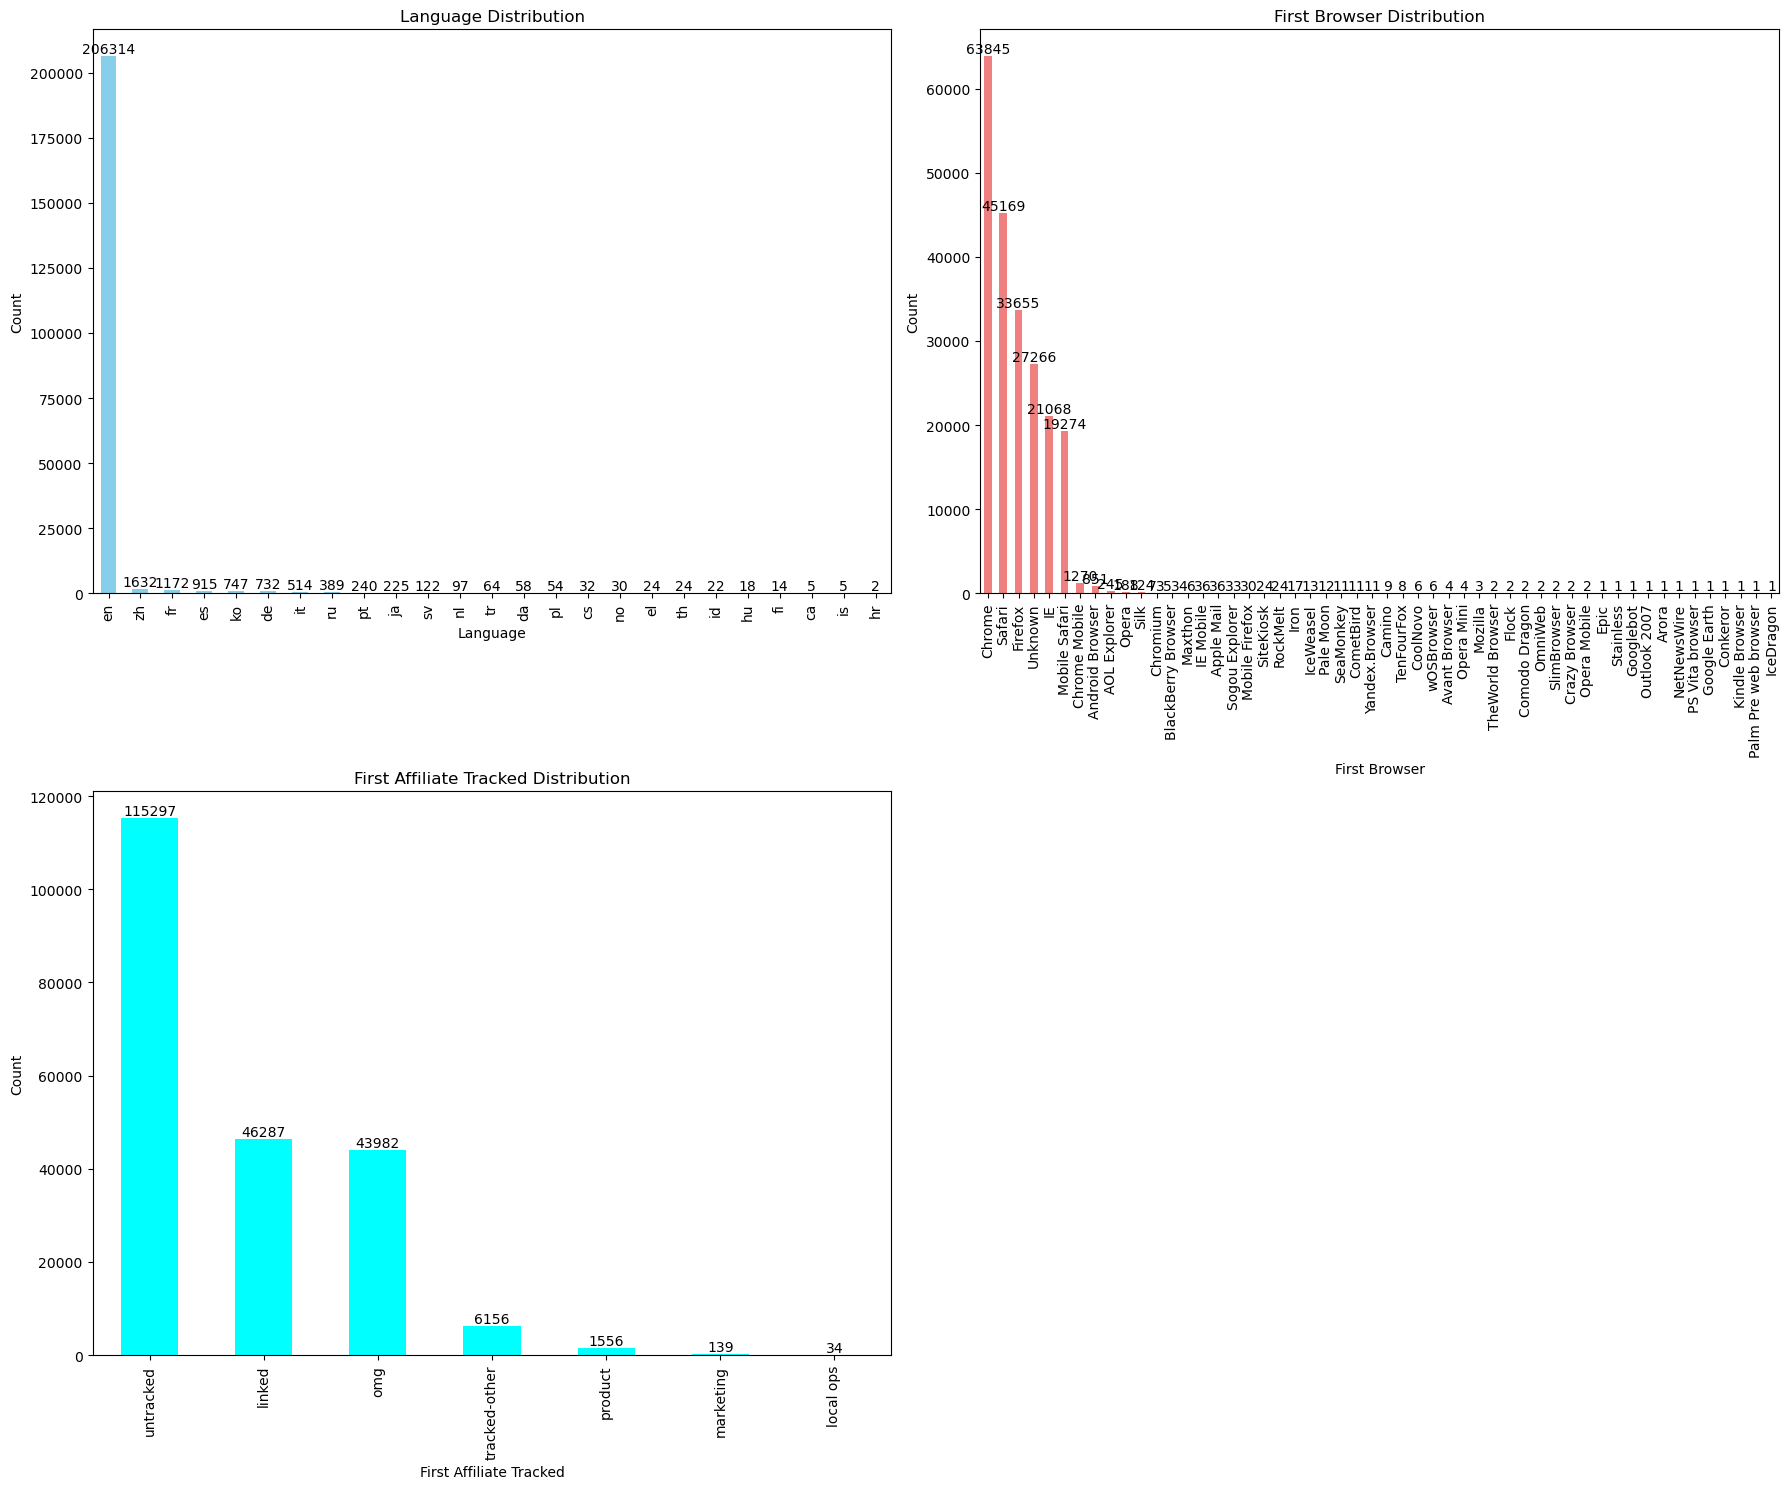

In [42]:

fig, axes = plt.subplots(2, 2, figsize=(18, 15))  # Create 2 rows and 2 columns of subplots

# Plot 1: Language Distribution
df_train['language'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Language Distribution')
axes[0, 0].set_xlabel('Language')
axes[0, 0].set_ylabel('Count')
axes[0, 0].bar_label(axes[0, 0].containers[0])

# Plot 2: First Browser Distribution
df_train['first_browser'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('First Browser Distribution')
axes[0, 1].set_xlabel('First Browser')
axes[0, 1].set_ylabel('Count')
axes[0, 1].bar_label(axes[0, 1].containers[0])

# Plot 3: First Affiliate Tracked Distribution
df_train['first_affiliate_tracked'].value_counts().plot(kind='bar', ax=axes[1, 0], color='cyan')
axes[1, 0].set_title('First Affiliate Tracked Distribution')
axes[1, 0].set_xlabel('First Affiliate Tracked')
axes[1, 0].set_ylabel('Count')
axes[1, 0].bar_label(axes[1, 0].containers[0])

# Hide the unused subplot
axes[1, 1].axis('off')  # Disable the fourth subplot

plt.tight_layout()
plt.show()


1. **Language Distribution**:  
   - Most users (206,314) use the main language (likely English). Other languages like French, Spanish, and German have very few users.

2. **First Browser Distribution**:  
   - **Chrome** is the most used browser (63,845), followed by **Safari** (45,169) and **Firefox** (33,655). Other browsers are rarely used.

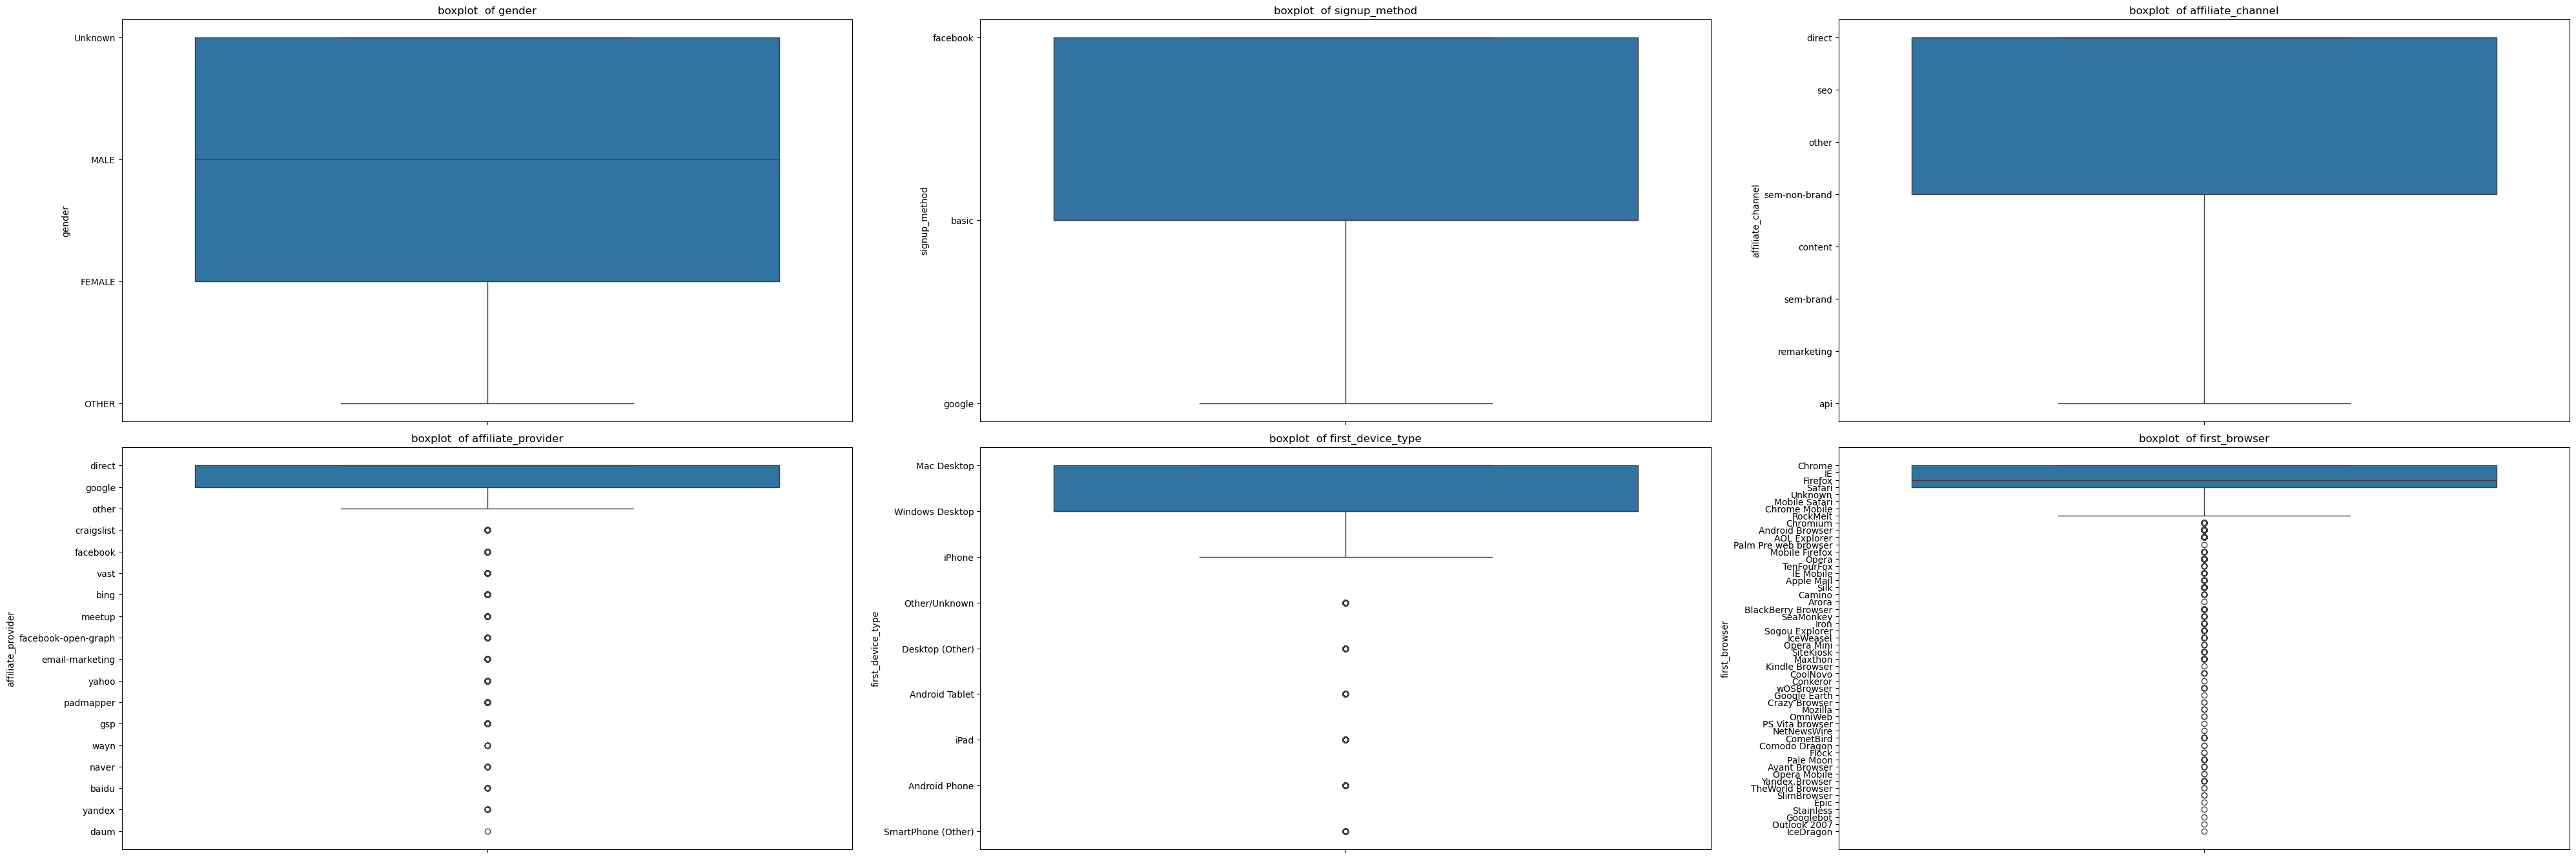

In [43]:
plt.figure(figsize=(40,20))
category_columns =['gender', 'signup_method', 'affiliate_channel', 'affiliate_provider', 'first_device_type',
       'first_browser']
for i , col in enumerate(category_columns):
    plt.subplot(3,3,i+1)
    ax=sns.boxplot(df_train[col])
    plt.title(f'boxplot  of {col}')
    plt.tight_layout()
plt.show()


1. **Gender:**  
   Most users are categorized as "Unknown," followed by "Male" and "Female." A small portion is marked as "Other."

2. **Signup Method:**  
   The majority of users registered using the "basic" method.

3. **Affiliate Channel:**  
   Most users came through the "direct" channel, with fewer using "seo" or "other" channels.

4. **Affiliate Provider:**  
   "Direct" is the dominant provider, followed by "Google"  Other providers show minimal usage.

5. **First Device Type:**  
   Desktops (Mac and Windows) are the most used devices

6. **First Browser:**  
   There is significant diversity in browsers, but "Chrome" and "Safari" are the most commonly used.



                                           2-univariate analysis

In [44]:
gender_country = df_train.groupby('gender')['country_destination'].value_counts().unstack()
gender_country

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
gender,,,,,,,,,,,,
FEMALE,207,455,358,853,1962,881,1091,31048,254,78,22694,3160
MALE,188,477,416,677,1335,682,699,26719,278,69,19457,3443
OTHER,1,5,3,4,13,3,5,106,3,1,116,22
Unknown,143,491,284,715,1713,758,1040,66670,227,69,20109,3469


1. **NDF (No Destination Found)** has the highest number of people across all genders. Most people did not select a destination.
   
2. For **Females**, the most popular destination (after NDF) is the **US** (22,694), followed by **France** (1,964) and **Spain** (853).

3. For **Males**, the most popular destination (after NDF) is the **US** (19,457), followed by **France** (1,333) and **Germany** (677).

4. **Other genders** have very few numbers. The most common destination for them is the **US** (116).

5. For people with **Unknown gender**, the most common choice is **NDF** (66,670), followed by the **US** (20,109).

6. Overall, the **US** is the most popular destination for people who choose to travel.

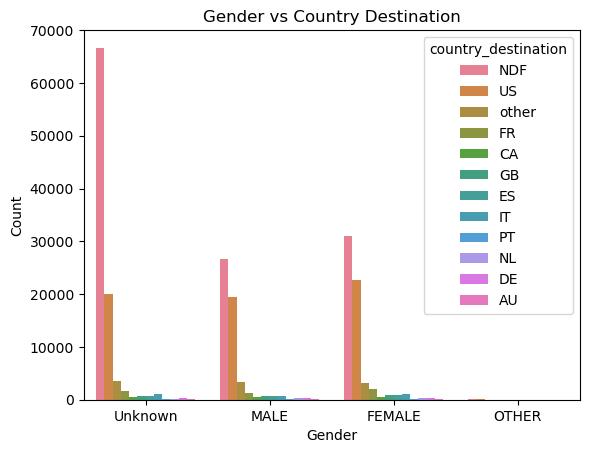

In [45]:
sns.countplot(data=df_train, x='gender', hue='country_destination')
plt.title('Gender vs Country Destination')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


- Most users, regardless of gender, belong to the **NDF** group.  
- The **US** is the second most common destination for all genders.  
- Users with "Other" gender make up a very small portion.

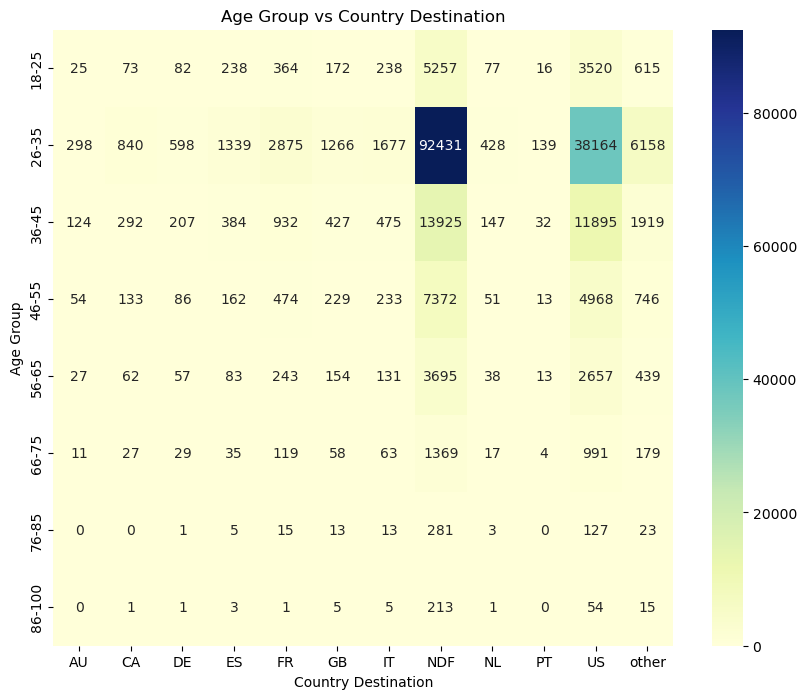

In [46]:
# Cross-tabulation of age_group and country_destination
cross_tab = pd.crosstab(df_train['age_group'], df_train['country_destination'])

plt.figure(figsize=(10, 8))  
sns.heatmap(cross_tab, annot=True, fmt="d", cmap='YlGnBu')

plt.title('Age Group vs Country Destination')
plt.xlabel('Country Destination')
plt.ylabel('Age Group')

plt.show()


<Figure size 1000x1000 with 0 Axes>

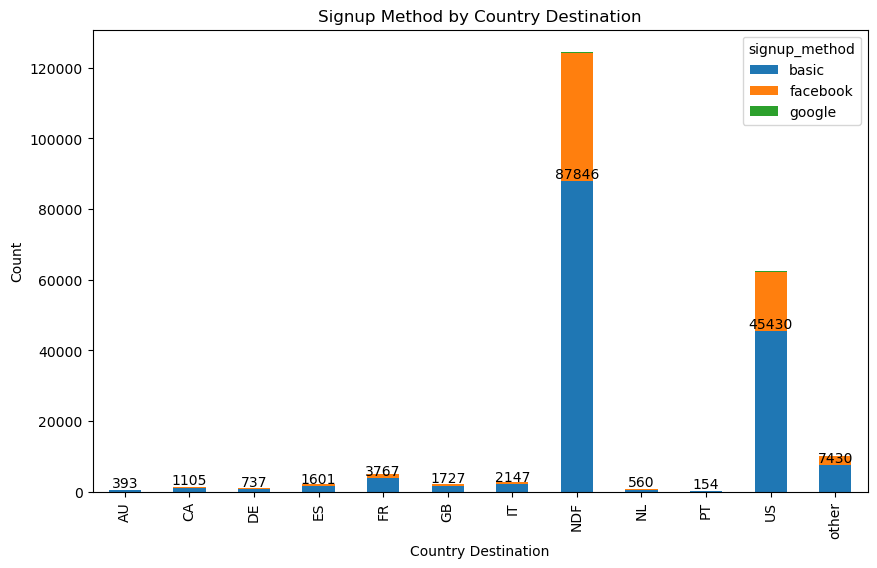

In [47]:
plt.figure(figsize=(10,10))
ax=df_train.groupby('country_destination')['signup_method'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Signup Method by Country Destination')
plt.xlabel('Country Destination')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])
plt.show()



- Most users signed up using **basic**, especially for **NDF** and the **US**.  
- **Facebook** is the second most common signup method, used more for smaller destinations  
- **Google** is the least used signup method across all destinations.

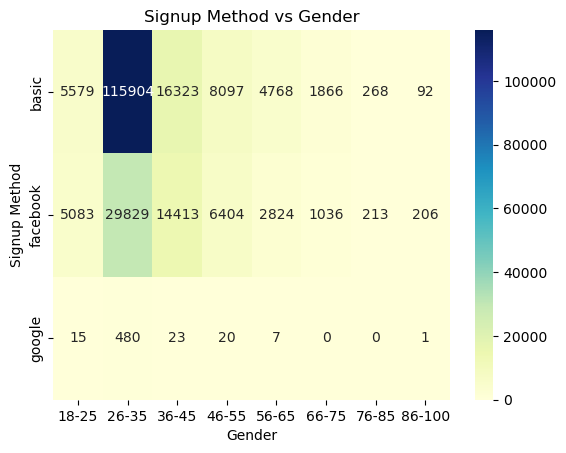

In [48]:
cross_tab = pd.crosstab(df_train['signup_method'], df_train['age_group'])
sns.heatmap(cross_tab, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Signup Method vs Gender')
plt.xlabel('Gender')
plt.ylabel('Signup Method')
plt.show()


 ==============================================**Sessions Data**=====================================================

In [49]:
df_sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [50]:
print(f'shape of data is {df_sessions.shape[0]} , {df_sessions.shape[1]}')

shape of data is 10567737 , 6


In [51]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [52]:
for col in df_sessions.columns:
    print(f' {col}:  \n number of unique value for each column {df_sessions[col].nunique()} , \n unique values is {df_sessions[col].unique()}')
    print('='*100)

 user_id:  
 number of unique value for each column 135483 , 
 unique values is ['d1mm9tcy42' 'yo8nz8bqcq' '4grx6yxeby' ... 'fa6260ziny' '87k0fy4ugm'
 '9uqfg8txu3']
 action:  
 number of unique value for each column 359 , 
 unique values is ['lookup' 'search_results' 'personalize' 'index' 'similar_listings'
 'ajax_refresh_subtotal' 'show' 'header_userpic' 'ask_question' nan
 'other_hosting_reviews_first' 'hosting_social_proof' 'decision_tree'
 'recent_reservations' 'faq_experiment_ids' 'multi' 'active' 'dashboard'
 'create' 'confirm_email' 'show_personalize' 'verify' 'pending'
 'requested' 'concierge' 'faq' 'clear_reservation' 'cancellation_policies'
 'track_page_view' 'update' 'my' 'campaigns' 'notifications' 'listings'
 'unavailabilities' 'ajax_lwlb_contact' 'ajax_check_dates' 'qt2'
 'request_new_confirm_email' 'ajax_photo_widget_form_iframe'
 'facebook_auto_login' 'identity' 'qt_reply_v2' 'travel_plans_current'
 'complete_status' 'populate_from_facebook' 'kba_update' 'kba' 'login'
 

In [53]:
print(df_sessions.isnull().sum())

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64


In [54]:
df_sessions.describe().T

,count,mean,std,min,25%,50%,75%,max
secs_elapsed,10431706.0,19405.810751,88884.243208,0.0,229.0,1147.0,8444.0,1799977.0


**Handle Missing Value**

In [55]:
df_sessions['action'] = df_sessions['action'].fillna('unknown')
df_sessions['action_type'] = df_sessions['action_type'].fillna('unknown')
df_sessions['action_detail'] = df_sessions['action_detail'].fillna('unknown')
df_sessions['secs_elapsed'] = df_sessions['secs_elapsed'].fillna(df_sessions['secs_elapsed'].median())  

print(df_sessions.isnull().sum())

user_id          34496
action               0
action_type          0
action_detail        0
device_type          0
secs_elapsed         0
dtype: int64


In [56]:
df_sessions['device_type'] = df_sessions['device_type'].replace('-unknown-', 'Unknown')
df_sessions['action_type'] = df_sessions['action_type'].replace('-unknown-', 'Unknown')

# **Merging Cleaned Training Data with Sessions Data**

In [57]:
df_sessions.rename(columns={'user_id': 'id'}, inplace=True)

In [58]:
sessions_summary = df_sessions.groupby('id').agg({
    'action': 'count',             
    'device_type': 'nunique',      
    'secs_elapsed': 'sum'          
}).reset_index()

sessions_summary.rename(columns={
    'action': 'num_actions',
    'device_type': 'num_devices',
    'secs_elapsed': 'total_secs'
}, inplace=True)


df_train = df_train.merge(sessions_summary, on='id', how='left')


**Grouped session data by user ID to calculate total actions, unique devices, and time spent:**  
- `action` → `num_actions` (total actions performed by the user),  
- `device_type` → `num_devices` (number of unique devices used),  
- `secs_elapsed` → `total_secs` (total time spent).  

Merged this summary with `df_train` to enrich it with user activity details for better predictions."

In [59]:
df_train.isnull().sum()

id                              0
date_first_booking              0
gender                          0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked         0
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
day_account_created             0
month_account_created           0
year_account_created            0
day_first_active                0
month_first_active              0
year_first_active               0
day_first_booking               0
month_first_booking             0
year_first_booking              0
age_group                       0
num_actions                139636
num_devices                139636
total_secs                 139636
dtype: int64

In [60]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
date_first_booking,213451,2013-08-13 13:37:17.487760896,2010-01-02 00:00:00,2013-09-11 00:00:00,2013-09-11 00:00:00,2013-09-11 00:00:00,2015-06-29 00:00:00,NaN
signup_flow,213451.0,3.267387,0.0,0.0,0.0,0.0,25.0,7.637707
day_account_created,213451.0,15.86923,1.0,8.0,16.0,23.0,31.0,8.740107
month_account_created,213451.0,6.022459,1.0,3.0,6.0,9.0,12.0,3.23669
year_account_created,213451.0,2013.023846,2010.0,2012.0,2013.0,2014.0,2014.0,0.938489
day_first_active,213451.0,15.869071,1.0,8.0,16.0,23.0,31.0,8.739582
month_first_active,213451.0,6.022385,1.0,3.0,6.0,9.0,12.0,3.236501
year_first_active,213451.0,2013.023218,2009.0,2012.0,2013.0,2014.0,2014.0,0.939039
day_first_booking,213451.0,12.934561,1.0,11.0,11.0,13.0,31.0,6.079097
month_first_booking,213451.0,7.796487,1.0,7.0,9.0,9.0,12.0,2.498683


In [61]:
df_train['num_actions'] = df_train['num_actions'].fillna(df_train['num_actions'].median())
df_train['num_devices'] = df_train['num_devices'].fillna(df_train['num_devices'].median())
df_train['total_secs'] = df_train['total_secs'].fillna(df_train['total_secs'].median())

In [62]:
df_train.drop(columns=['id'], inplace=True)

In [63]:
df_train

,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,day_first_active,month_first_active,year_first_active,day_first_booking,month_first_booking,year_first_booking,age_group,num_actions,num_devices,total_secs
0,2013-09-11,Unknown,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,19,3,2009,11,9,2013,26-35,38.0,1.0,874009.0
1,2013-09-11,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,23,5,2009,11,9,2013,36-45,38.0,1.0,874009.0
2,2010-08-02,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,...,9,6,2009,2,8,2010,56-65,38.0,1.0,874009.0
3,2012-09-08,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,31,10,2009,8,9,2012,36-45,38.0,1.0,874009.0
4,2010-02-18,Unknown,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,8,12,2009,18,2,2010,36-45,38.0,1.0,874009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,2013-09-11,MALE,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,...,30,6,2014,11,9,2013,26-35,110.0,2.0,5142543.0
213447,2013-09-11,Unknown,basic,0,en,direct,direct,linked,Web,Windows Desktop,...,30,6,2014,11,9,2013,26-35,238.0,3.0,2880071.0
213448,2013-09-11,Unknown,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,30,6,2014,11,9,2013,26-35,18.0,1.0,344129.0
213449,2013-09-11,Unknown,basic,25,en,other,other,tracked-other,iOS,iPhone,...,30,6,2014,11,9,2013,26-35,75.0,1.0,342756.0


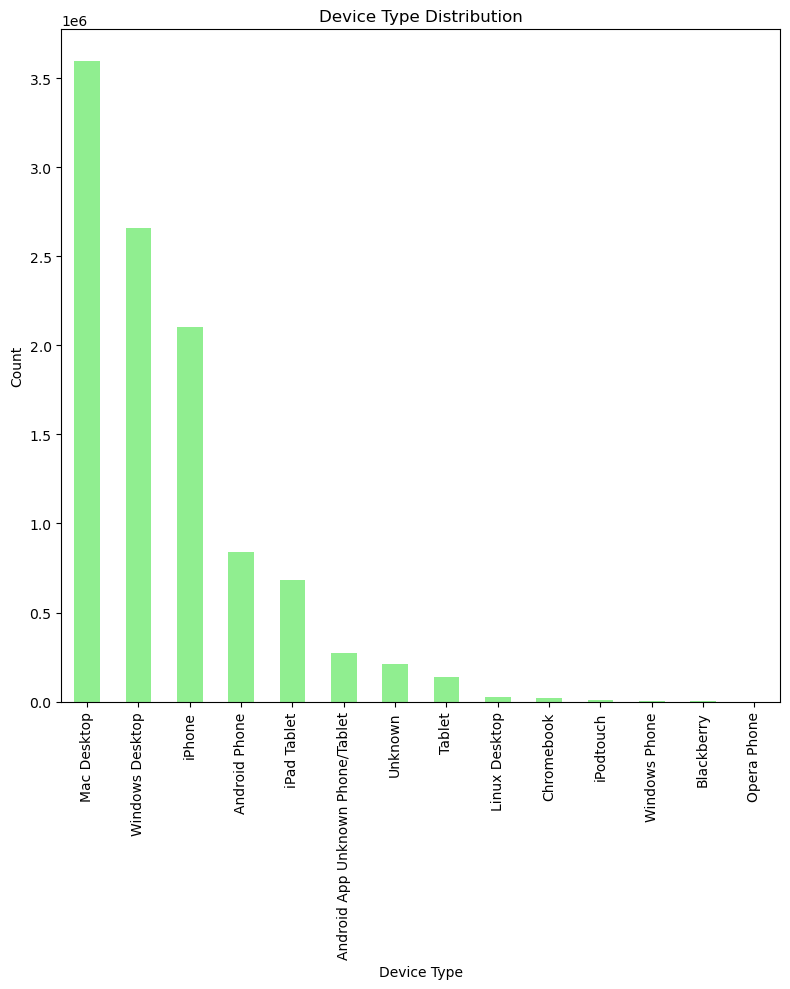

In [64]:
plt.figure(figsize=(8,10))
ax=df_sessions['device_type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Device Type Distribution')
plt.xlabel('Device Type')
plt.ylabel('Count')
# ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

Most users use **Mac Desktop**, **Windows Desktop**, and **iPhones**. Fewer users prefer **Android phones** and **iPads**, 
while very few use rare devices like **Blackberry** or **Windows Phone**.ipynb_checkpoints

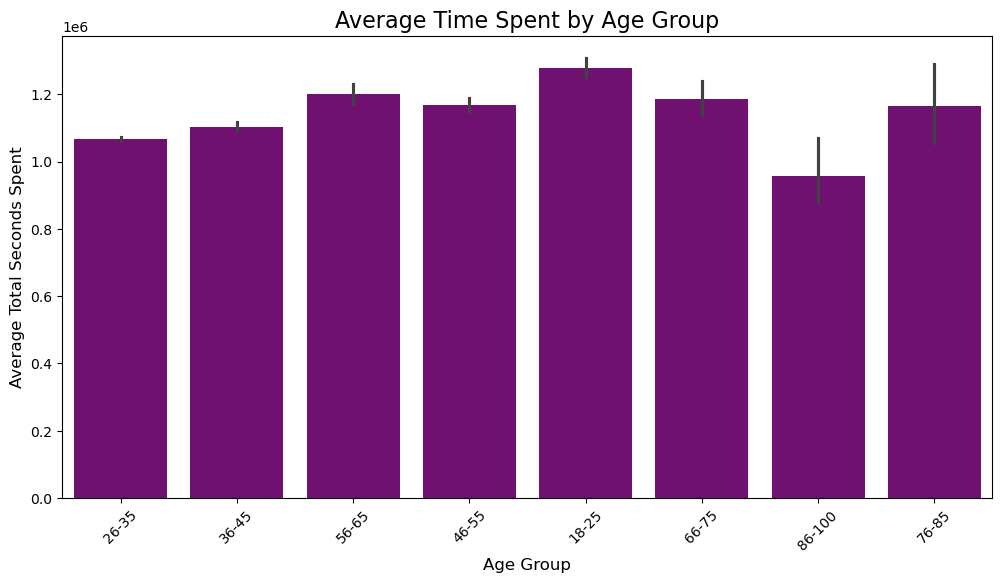

In [65]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(x='age_group', y='total_secs', data=df_train,  estimator='mean', color='purple')
plt.title("Average Time Spent by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Total Seconds Spent", fontsize=12)
plt.xticks(rotation=45)
plt.show()

 shows the **average total time spent** by different age groups.  

- The **18-25** age group spends the most time on average.  
- Other age groups, like **56-65** and **26-35**, also have high average time spent.  
- Older age groups, especially **86-100**, spend less time on average compared to younger ones.

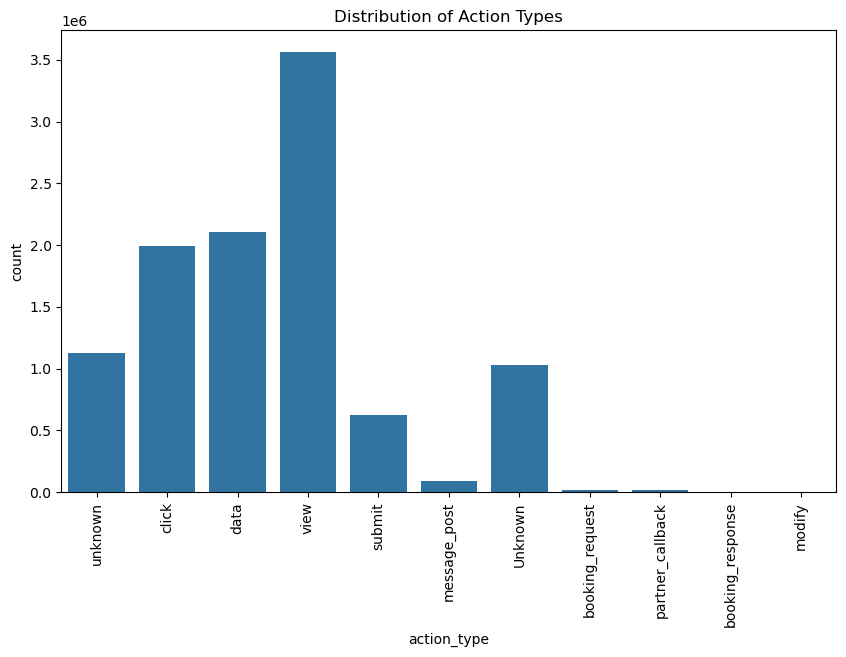

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sessions, x='action_type')
plt.title('Distribution of Action Types')
plt.xticks(rotation=90)
plt.show()

 **distribution of action types**:  

- **View** is the most common action type, with the highest count.  
- **Click** and **Data** actions are also frequent, but less than "View".  
- Other actions like **Submit** and **Unknown** occur less often.  
- Rare actions include **Message Post**, **Booking Request**, and **Modify**.

                                     3-MultiVariate Analysis

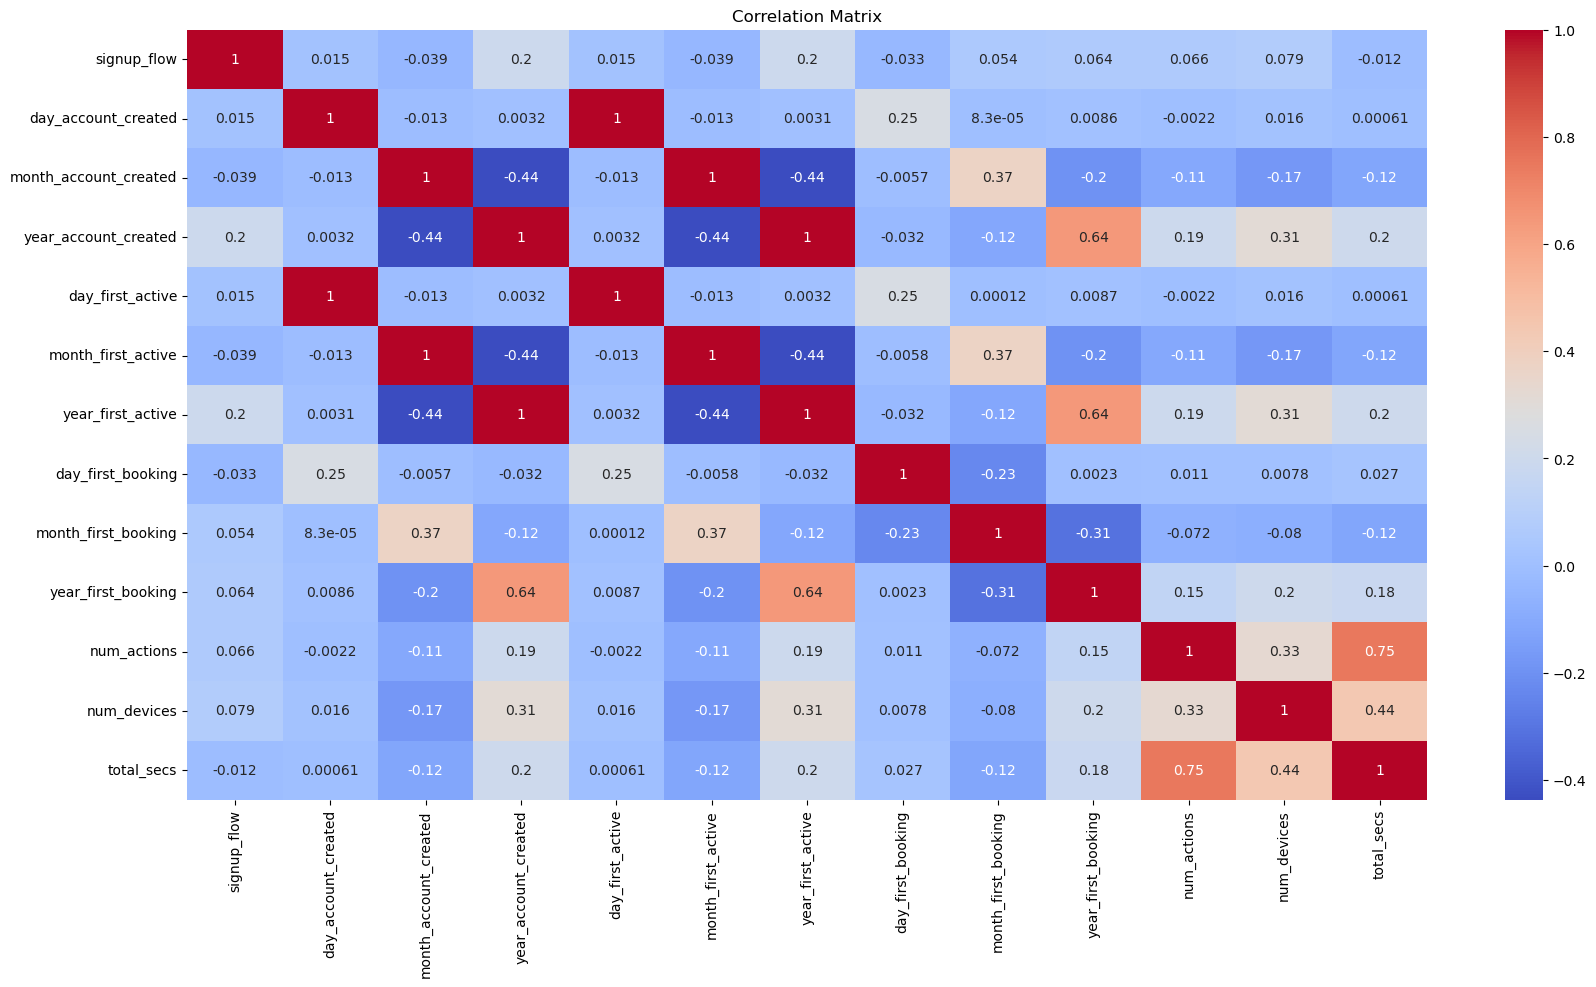

In [67]:
plt.figure(figsize=(20, 10))

corr_matrix = df_train.select_dtypes(include='number').corr()#correlation heatmap to show relatioships
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation matrix shows the relationship between different variables:  

1. **Strong Relationships** (Useful for prediction):
   - **`num_actions` & `total_secs`**: Correlation = **0.75**  
     -> More time on the platform = More actions. Both are important for predictions.

   - **`year_account_created` & `year_first_booking`**: Correlation = **0.64**  
     -> Users often book in the same year they create their account.

2. **Weak Relationships** (Not very useful):
   - **`signup_flow`**: Correlation with other variables is between **-0.03 and 0.08**  
     -> No strong impact, can be ignored.

3. **Moderate Negative Relationship**:
   - **`month_account_created` & `year_account_created`**: Correlation = **-0.44**  
     -> Inverse relationship, may have some predictive value.

4. **Weak Action-Booking Link**:
   - **`num_actions` & `year_first_booking`**: Correlation = **0.15**  
     -> Number of actions does not strongly indicate the booking year.

### Final Tip:
Focus on **`num_actions`**, **`total_secs`**, **`year_account_created`**, and **`year_first_booking`**. Ignore **`signup_flow`**.

 ==============================================**sample_submission Data**=====================================================

In [68]:
df_sample_submission_NDF

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF
...,...,...
62091,cv0na2lf5a,NDF
62092,zp8xfonng8,NDF
62093,fa6260ziny,NDF
62094,87k0fy4ugm,NDF


In [69]:
print(f'shape of data is {df_sample_submission_NDF.shape[0]} , {df_sample_submission_NDF.shape[1]}')

shape of data is 62096 , 2


In [70]:
df_sample_submission_NDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       62096 non-null  object
 1   country  62096 non-null  object
dtypes: object(2)
memory usage: 970.4+ KB


In [71]:
for col in df_sample_submission_NDF.columns:
    print(f' {col}:  \n number of unique value for each column {df_sample_submission_NDF[col].nunique()} , \n unique values is {df_sample_submission_NDF[col].unique()}')
    print('='*100)

 id:  
 number of unique value for each column 62096 , 
 unique values is ['5uwns89zht' 'jtl0dijy2j' 'xx0ulgorjt' ... 'fa6260ziny' '87k0fy4ugm'
 '9uqfg8txu3']
 country:  
 number of unique value for each column 1 , 
 unique values is ['NDF']


================================================**countries Data**======================================================

In [72]:
df_countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [73]:
print(f'shape of data is {df_countries.shape[0]} , {df_countries.shape[1]}')

shape of data is 10 , 7


In [74]:
df_countries.isnull().sum()

country_destination              0
lat_destination                  0
lng_destination                  0
distance_km                      0
destination_km2                  0
destination_language             0
language_levenshtein_distance    0
dtype: int64

In [75]:
for col in df_countries.columns:
    print(f' {col}:  \n number of unique value for each column {df_countries[col].nunique()} , \n unique values is {df_countries[col].unique()}')
    print('='*100)

 country_destination:  
 number of unique value for each column 10 , 
 unique values is ['AU' 'CA' 'DE' 'ES' 'FR' 'GB' 'IT' 'NL' 'PT' 'US']
 lat_destination:  
 number of unique value for each column 10 , 
 unique values is [-26.853388  62.393303  51.165707  39.896027  46.232193  54.63322
  41.87399   52.133057  39.553444  36.966427]
 lng_destination:  
 number of unique value for each column 10 , 
 unique values is [133.27516   -96.818146   10.452764   -2.4876945   2.209667   -3.4322774
  12.564167    5.29525    -7.839319  -95.84403  ]
 distance_km:  
 number of unique value for each column 10 , 
 unique values is [15297.744   2828.1333  7879.568   7730.724   7682.945   6883.659
  8636.631   7524.3203  7355.2534     0.    ]
 destination_km2:  
 number of unique value for each column 10 , 
 unique values is [7741220. 9984670.  357022.  505370.  643801.  243610.  301340.   41543.
   92090. 9826675.]
 destination_language :  
 number of unique value for each column 7 , 
 unique values is

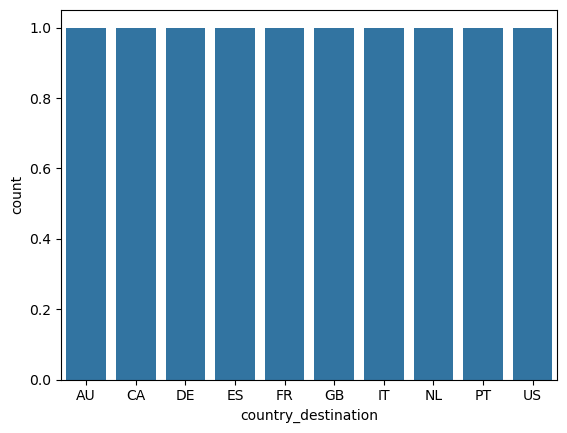

In [76]:
ax=sns.countplot(x='country_destination', data=df_countries)

Text(0.5, 1.0, 'Distribution of Distances')

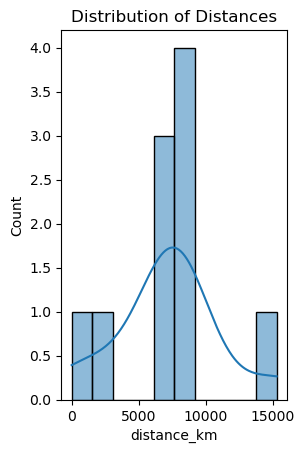

In [77]:
plt.subplot(1, 2, 1)
sns.histplot(df_countries['distance_km'], bins=10, kde=True)
plt.title('Distribution of Distances')

The graph shows most distances are between 5,000 and 10,000 km. Short (0–5,000 km) and 
long distances (above 10,000 km) are less common.
Medium distances are the most frequent.

==============================================**age_gender Data**=====================================================

In [78]:
df_age_gender

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
...,...,...,...,...,...
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0


In [79]:
df_age_gender.isnull().sum()

age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64

In [80]:
df_age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [81]:
columns = ['age_bucket', 'country_destination', 'gender', 'year']
for col in columns:
    print(f'{col}:')
    print(f'Number of unique values: {df_age_gender[col].nunique()}')
    print(f'Unique values: {df_age_gender[col].unique()}')
    print('=' * 100)

age_bucket:
Number of unique values: 21
Unique values: ['100+' '95-99' '90-94' '85-89' '80-84' '75-79' '70-74' '65-69' '60-64'
 '55-59' '50-54' '45-49' '40-44' '35-39' '30-34' '25-29' '20-24' '15-19'
 '10-14' '5-9' '0-4']
country_destination:
Number of unique values: 10
Unique values: ['AU' 'CA' 'DE' 'ES' 'FR' 'GB' 'IT' 'NL' 'PT' 'US']
gender:
Number of unique values: 2
Unique values: ['male' 'female']
year:
Number of unique values: 1
Unique values: [2015.]


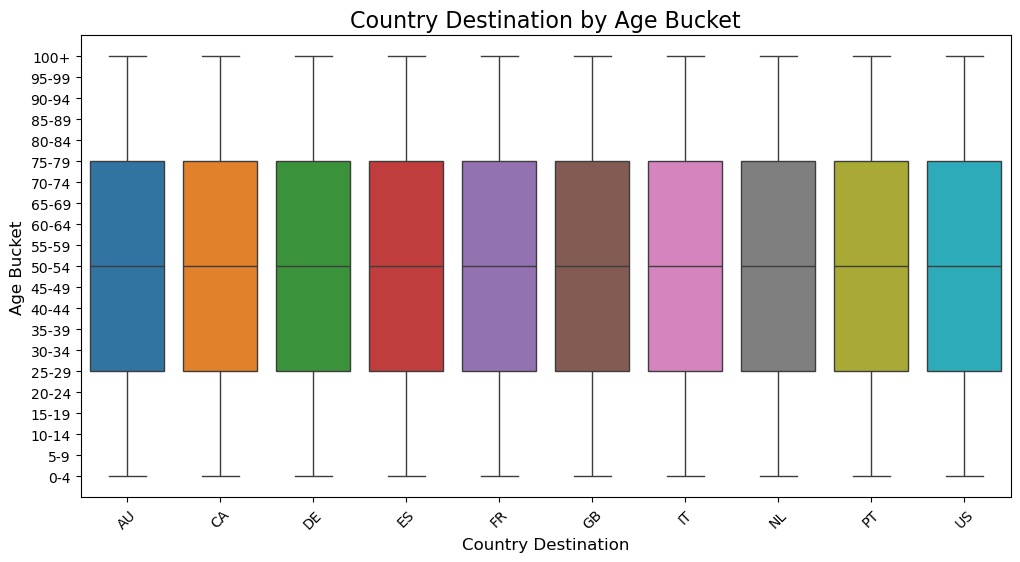

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_age_gender, x='country_destination', y='age_bucket', hue='country_destination')
plt.title('Country Destination by Age Bucket', fontsize=16)
plt.xlabel('Country Destination', fontsize=12)
plt.ylabel('Age Bucket', fontsize=12)
plt.xticks(rotation=45)
plt.legend([], frameon=False)  
plt.show()


 shows the relationship between **country destinations** and **age groups** of users.  

- The **median age** is similar across all countries, mostly in the **50-54 age range**.  
- The **age range** (spread) is also consistent for all destinations.  
- No major outliers or unusual patterns are visible.  

===========================================**df_test Data**============================================================

I will apply the same processes I used for the training data to the test data, with some additional steps for better handling.

In [83]:
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [84]:
print(f'shape of data is {df_test.shape[0]} , {df_test.shape[1]}')

shape of data is 62096 , 15


In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

In [86]:
df_test.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [87]:
df_test.duplicated().sum()

0

In [88]:
for col in df_test.columns:
    print(f' {col}:  \n number of unique value for each column {df_test[col].nunique()} , \n unique values is {df_test[col].unique()}')
    print('='*100)

 id:  
 number of unique value for each column 62096 , 
 unique values is ['5uwns89zht' 'jtl0dijy2j' 'xx0ulgorjt' ... 'fa6260ziny' '87k0fy4ugm'
 '9uqfg8txu3']
 date_account_created:  
 number of unique value for each column 92 , 
 unique values is ['2014-07-01' '2014-07-02' '2014-07-03' '2014-07-04' '2014-07-05'
 '2014-07-06' '2014-07-07' '2014-07-08' '2014-07-09' '2014-07-10'
 '2014-07-11' '2014-07-12' '2014-07-13' '2014-07-14' '2014-07-15'
 '2014-07-16' '2014-07-17' '2014-07-18' '2014-07-19' '2014-07-20'
 '2014-07-21' '2014-07-22' '2014-07-23' '2014-07-24' '2014-07-25'
 '2014-07-26' '2014-07-27' '2014-07-28' '2014-07-29' '2014-07-30'
 '2014-07-31' '2014-08-01' '2014-08-02' '2014-08-03' '2014-08-04'
 '2014-08-05' '2014-08-06' '2014-08-07' '2014-08-08' '2014-08-09'
 '2014-08-10' '2014-08-11' '2014-08-12' '2014-08-13' '2014-08-14'
 '2014-08-15' '2014-08-16' '2014-08-17' '2014-08-18' '2014-08-19'
 '2014-08-20' '2014-08-21' '2014-08-22' '2014-08-23' '2014-08-24'
 '2014-08-25' '2014-08-26'

# Fill 'date_first_booking' in df_test from df_train 


In [89]:
df_test['date_first_booking'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
62091   NaN
62092   NaN
62093   NaN
62094   NaN
62095   NaN
Name: date_first_booking, Length: 62096, dtype: float64>

To fill the missing values in the `date_first_booking` column in `df_test` with random dates from the `date_first_booking` column in `df_train`, follow these steps:

1. **Find the date range**: Get the minimum and maximum dates from `df_train['date_first_booking']`.
2. **Generate random dates**: Create random dates within this range.
3. **Fill missing values**: Use these random dates to fill the NaN values in `df_test['date_first_booking']`.

This process ensures that missing dates in `df_test` are filled with random dates between the earliest and latest dates from `df_train`.

In [90]:
df_test['date_first_booking'] = pd.to_datetime(df_test['date_first_booking'], errors='coerce')

In [91]:
oldest_date_1 = df_train['date_first_booking'].min()
latest_date_2 = df_train['date_first_booking'].max()

print(f'date_first_booking: {oldest_date_1} {latest_date_2}')

date_first_booking: 2010-01-02 00:00:00 2015-06-29 00:00:00


In [92]:
start_date = oldest_date_1
end_date = latest_date_2

date_range = pd.date_range(start=start_date, end=end_date, freq='D')

missing_dates_count = df_test['date_first_booking'].isna().sum()

random_dates = np.random.choice(date_range, size=missing_dates_count)

df_test.loc[df_test['date_first_booking'].isna(), 'date_first_booking'] = random_dates

print("Done🤝")

Done🤝


In [93]:
df_test['date_first_booking']

0       2012-05-09
1       2011-10-29
2       2011-10-10
3       2011-05-22
4       2011-07-02
           ...    
62091   2014-06-05
62092   2014-03-18
62093   2010-07-04
62094   2010-03-05
62095   2013-10-19
Name: date_first_booking, Length: 62096, dtype: datetime64[ns]

#  Transformation and Extracting

In [94]:
df_test['date_account_created'] = pd.to_datetime(df_test['date_account_created'])

In [95]:
df_test['timestamp_first_active'] = df_test['timestamp_first_active'].astype(str)
df_test['timestamp_first_active'] = pd.to_datetime(df_test['timestamp_first_active'], format='%Y%m%d%H%M%S')
print(df_test['timestamp_first_active'].head())

0   2014-07-01 00:00:06
1   2014-07-01 00:00:51
2   2014-07-01 00:01:48
3   2014-07-01 00:02:15
4   2014-07-01 00:03:05
Name: timestamp_first_active, dtype: datetime64[ns]


In [96]:
df_test['day_account_created'] = df_test['date_account_created'].dt.day
df_test['month_account_created'] = df_test['date_account_created'].dt.month
df_test['year_account_created'] = df_test['date_account_created'].dt.year

df_test['day_first_active'] = df_test['timestamp_first_active'].dt.day
df_test['month_first_active'] = df_test['timestamp_first_active'].dt.month
df_test['year_first_active'] = df_test['timestamp_first_active'].dt.year

df_test['day_first_booking'] = df_test['date_first_booking'].dt.day
df_test['month_first_booking'] = df_test['date_first_booking'].dt.month
df_test['year_first_booking'] = df_test['date_first_booking'].dt.year

# Deleting irrelevant Features

In [97]:
df_test.drop(columns=['date_account_created', 'timestamp_first_active', 'date_first_booking'], inplace=True)

In [98]:
# df_test = df_test.drop(columns=columns_to_drop)
# df_test.drop(columns=['id'], inplace=True)

In [99]:
df_train.drop(columns=['date_first_booking'], inplace=True)

# check for null values

In [100]:
df_test.isnull().sum()

id                             0
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
day_account_created            0
month_account_created          0
year_account_created           0
day_first_active               0
month_first_active             0
year_first_active              0
day_first_booking              0
month_first_booking            0
year_first_booking             0
dtype: int64

In [101]:
df_test['age'].value_counts

<bound method IndexOpsMixin.value_counts of 0        35.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
62091    31.0
62092     NaN
62093     NaN
62094     NaN
62095    49.0
Name: age, Length: 62096, dtype: float64>

# Handle Missing Value

In [102]:
# df_test['age'] = df_test['age'].fillna(df_test['age'].median())
df_test['first_affiliate_tracked'] = df_test['first_affiliate_tracked'].fillna(df_test['first_affiliate_tracked'].mode()[0])

In [103]:
df_test['gender'] = df_test['gender'].replace('-unknown-', 'Unknown')
df_test['language'] = df_test['language'].replace('-unknown-', 'Unknown')

In [104]:
mode_signup_method = df_test['signup_method'].mode()[0]

# Replace 'weibo' with the mode in the 'signup_method' column bec is not present in the df_train
df_test['signup_method'] = df_test['signup_method'].replace('weibo', mode_signup_method)


In [105]:
df_test.isnull().any().any()

True

In [106]:
df_test['age'].value_counts()

age
28.0      1748
27.0      1724
26.0      1701
25.0      1690
29.0      1684
          ... 
1945.0       1
2000.0       1
1938.0       1
1939.0       1
108.0        1
Name: count, Length: 124, dtype: int64

In [107]:
min_age = 18
max_age = 100


df_test['age'] = df_test['age'].apply(lambda x: x if min_age <= x <= max_age else df_test['age'].median())

bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']

df_test['age_group'] = pd.cut(df_test['age'], bins=bins, labels=labels, right=False)

print(df_test['age_group'].value_counts())

age_group
26-35     44657
36-45      6655
18-25      5256
46-55      3232
56-65      1567
66-75       581
76-85        90
86-100       53
Name: count, dtype: int64


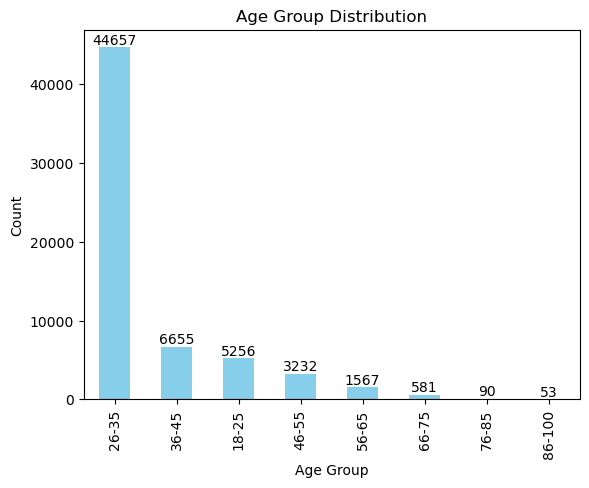

In [108]:
ax=df_test['age_group'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])

plt.show()

In [109]:
df_test.drop(columns=['age'], inplace=True)

In [110]:
df_test.isna().sum()

id                         0
gender                     0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
day_account_created        0
month_account_created      0
year_account_created       0
day_first_active           0
month_first_active         0
year_first_active          0
day_first_booking          0
month_first_booking        0
year_first_booking         0
age_group                  5
dtype: int64

In [111]:
most_frequent_age_group = df_test['age_group'].mode()[0]
df_test['age_group'].fillna(most_frequent_age_group,inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_696\1041072351.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['age_group'].fillna(most_frequent_age_group,inplace=True)


# Merging Cleaned Testing Data with Sessions Data  With Same Steps 

In [112]:
sessions_summary = df_sessions.groupby('id').agg({
    'action': 'count',             
    'device_type': 'nunique',      
    'secs_elapsed': 'sum'          
}).reset_index()

sessions_summary.rename(columns={
    'action': 'num_actions',
    'device_type': 'num_devices',
    'secs_elapsed': 'total_secs'
}, inplace=True)

df_test = df_test.merge(sessions_summary, on='id', how='left')

In [113]:
df_test.isnull().sum()

id                           0
gender                       0
signup_method                0
signup_flow                  0
language                     0
affiliate_channel            0
affiliate_provider           0
first_affiliate_tracked      0
signup_app                   0
first_device_type            0
first_browser                0
day_account_created          0
month_account_created        0
year_account_created         0
day_first_active             0
month_first_active           0
year_first_active            0
day_first_booking            0
month_first_booking          0
year_first_booking           0
age_group                    0
num_actions                428
num_devices                428
total_secs                 428
dtype: int64

In [114]:
df_test['num_actions'] = df_test['num_actions'].fillna(df_test['num_actions'].median())
df_test['num_devices'] = df_test['num_devices'].fillna(df_test['num_devices'].median())
df_test['total_secs'] = df_test['total_secs'].fillna(df_test['total_secs'].median())

In [115]:
df_train.to_csv('F:\\Andalosia\\airbnb-recruiting-new-user-bookings\\data_clean\\df_train_1.csv', index=False)
df_test.to_csv('F:\\Andalosia\\airbnb-recruiting-new-user-bookings\\data_clean\\df_test_1.csv', index=False)

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gender                   213451 non-null  object 
 1   signup_method            213451 non-null  object 
 2   signup_flow              213451 non-null  int64  
 3   language                 213451 non-null  object 
 4   affiliate_channel        213451 non-null  object 
 5   affiliate_provider       213451 non-null  object 
 6   first_affiliate_tracked  213451 non-null  object 
 7   signup_app               213451 non-null  object 
 8   first_device_type        213451 non-null  object 
 9   first_browser            213451 non-null  object 
 10  country_destination      213451 non-null  object 
 11  day_account_created      213451 non-null  int32  
 12  month_account_created    213451 non-null  int32  
 13  year_account_created     213451 non-null  int32  
 14  day_

In [117]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       62096 non-null  object  
 1   gender                   62096 non-null  object  
 2   signup_method            62096 non-null  object  
 3   signup_flow              62096 non-null  int64   
 4   language                 62096 non-null  object  
 5   affiliate_channel        62096 non-null  object  
 6   affiliate_provider       62096 non-null  object  
 7   first_affiliate_tracked  62096 non-null  object  
 8   signup_app               62096 non-null  object  
 9   first_device_type        62096 non-null  object  
 10  first_browser            62096 non-null  object  
 11  day_account_created      62096 non-null  int32   
 12  month_account_created    62096 non-null  int32   
 13  year_account_created     62096 non-null  int32   
 14  day_fi